# My very first binary

In [79]:
import os

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.gridspec import GridSpec

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import astropy.constants as const
import astropy.units as u

from astropy.visualization import quantity_support
quantity_support()

from ipywidgets import interact, IntSlider, FloatSlider

import seaborn as sns

In [80]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Load and prep data

In [81]:
from importlib import reload
import sys
sys.path.append("../")

import mesagrid
reload(mesagrid);

sys.path.append("../helpers")
import mesaplot_tom as mpt
reload(mpt);

In [4]:
tracks = {
    "conservative": [mesagrid.Track(os.path.join("../output/cluster/binaries/", "conservative"), dir_name="LOGS_star1", parameters="Donor"),
                     mesagrid.Track(os.path.join("../output/cluster/binaries/", "conservative"), dir_name="LOGS_star2", parameters="Accretor")],
    "beta_0.5": [mesagrid.Track(os.path.join("../output/cluster/binaries/", "beta_0.5"), dir_name="LOGS_star1", parameters="Donor"),
                 mesagrid.Track(os.path.join("../output/cluster/binaries/", "beta_0.5"), dir_name="LOGS_star2", parameters="Accretor")],
    "detach_4_3_5": [mesagrid.Track(os.path.join("../output/cluster/binaries/detachers", "4_3_5"), dir_name=f"LOGS_star{ind}", parameters=label)
                     for ind, label in [(1, "Donor"), (2, "Accretor")]],
    "detach_2.5_2_4": [mesagrid.Track(os.path.join("../output/cluster/binaries/detachers", "2.5_2_4"), dir_name=f"LOGS_star{ind}", parameters=label)
                     for ind, label in [(1, "Donor"), (2, "Accretor")]],
    "detach_2.5_2_3": [mesagrid.Track(os.path.join("../output/cluster/binaries/detachers", "2.5_2_3"), dir_name=f"LOGS_star{ind}", parameters=label)
                     for ind, label in [(1, "Donor"), (2, "Accretor")]],
}

In [82]:
tracks["detach_2.5_2_3_tm"] = [mesagrid.Track(os.path.join("../output/cluster/binaries/detachers", "2.5_2_3_tm"), dir_name=f"LOGS_star{ind}", parameters=label)
                     for ind, label in [(1, "Donor"), (2, "Accretor")]]

In [84]:
tracks["detach_2.5_2_4_tm"] = [mesagrid.Track(os.path.join("../output/cluster/binaries/detachers", "2.5_2_4_tm"), dir_name=f"LOGS_star{ind}", parameters=label)
                     for ind, label in [(1, "Donor"), (2, "Accretor")]]

In [139]:
single_tracks = {}
Ms = np.arange(3.0, 6.1, 0.1)
for M in Ms:
    folder = f"M_{M:1.1f}"
    single_tracks[folder] = mesagrid.Track(dir=f"../output/cluster/singles_grid/{folder}", parameters=folder)

In [142]:
for M in Ms:
    print()

0.0
0.10000000000000009
0.20000000000000018
0.2999999999999998
0.3999999999999999
0.0
0.10000000000000009
0.20000000000000018
0.2999999999999998
0.3999999999999999
0.0
0.09999999999999964
0.20000000000000018
0.2999999999999998
0.40000000000000036
0.0
0.09999999999999964
0.20000000000000018
0.2999999999999998
0.40000000000000036
0.0
0.09999999999999964
0.20000000000000018
0.2999999999999998
0.40000000000000036
0.0
0.09999999999999964
0.20000000000000018
0.2999999999999998
0.40000000000000036
0.0


In [ ]:
def add_singles_tracks(fig, ax):
    for M in Ms:
        folder = f"M_{M:1.1f}"
        ans = fr"$M = {{{M:1.1f}}} {{\rm M_\odot}}$" if M.round(1) % 0.5 == 0.0 else None
        fig, ax = mpt.simple_hr(single_tracks[folder], fig=fig, ax=ax, show=False, cbar_var=None,
                                annotate_start=ans, s=0)
    return fig, ax

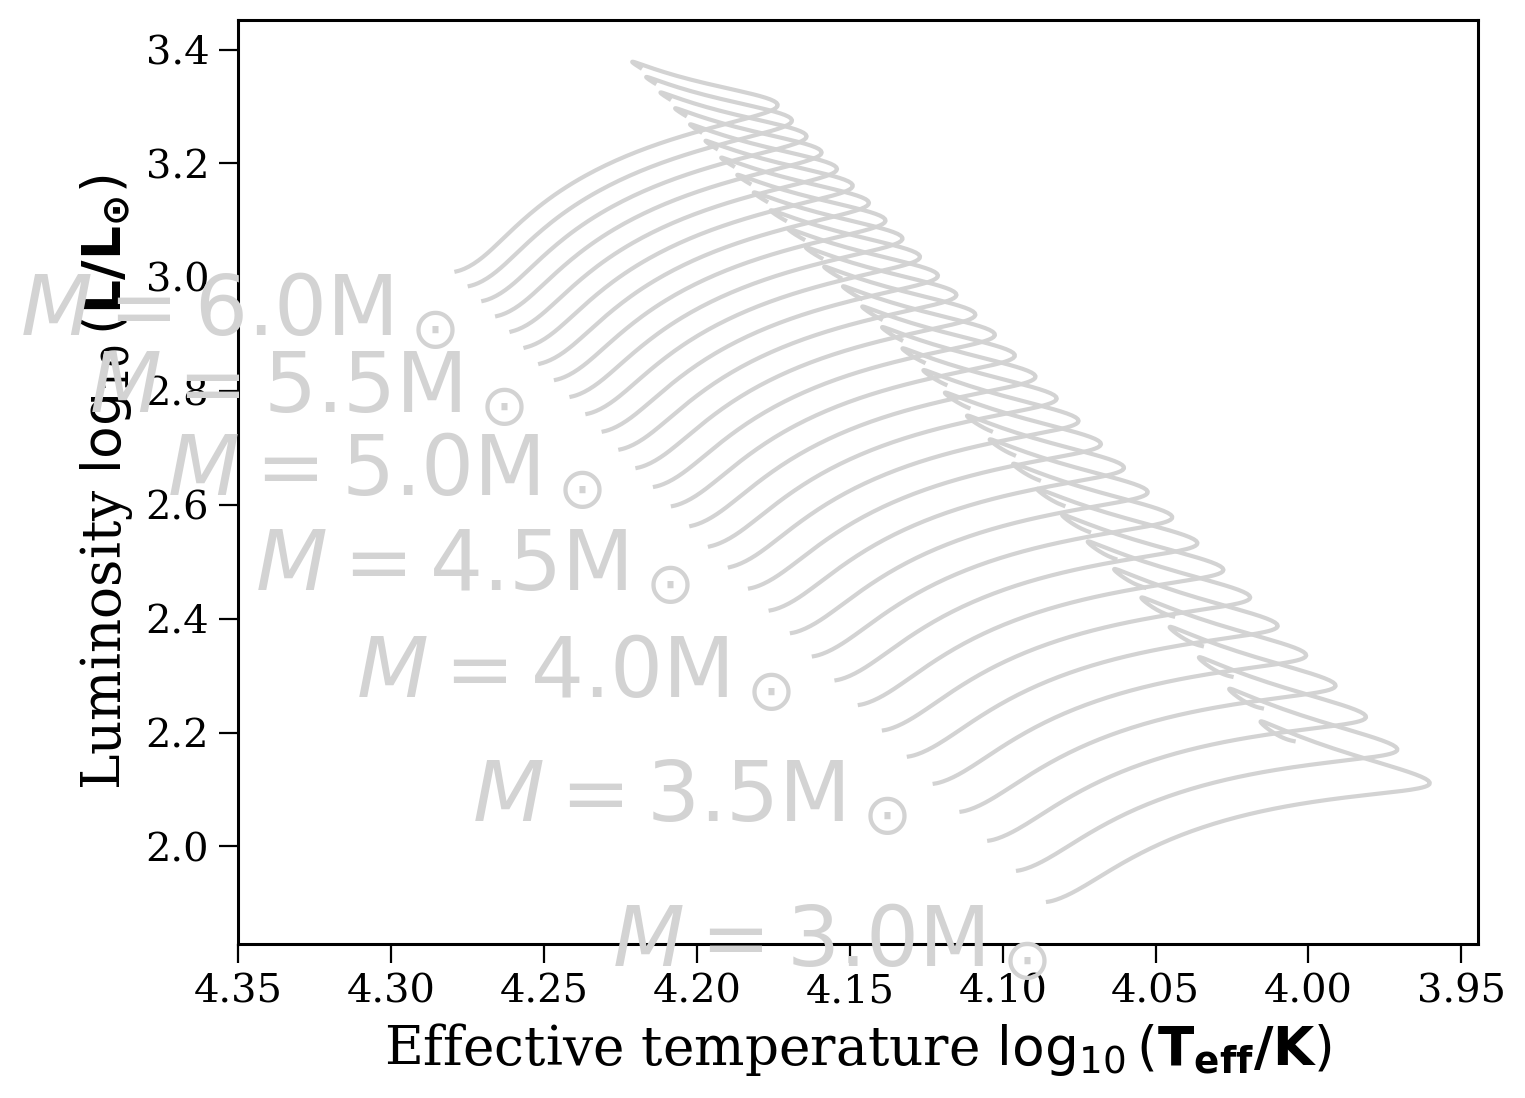

In [145]:
fig, ax = None, None
for M in Ms:
    folder = f"M_{M:1.1f}"
    ans = fr"$M = {{{M:1.1f}}} {{\rm M_\odot}}$" if M.round(1) % 0.5 == 0.0 else None
    fig, ax = mpt.simple_hr(single_tracks[folder], fig=fig, ax=ax, show=False, cbar_var=None,
                            annotate_start=ans, s=0)
ax.set_xlim(left=4.35)
plt.show()

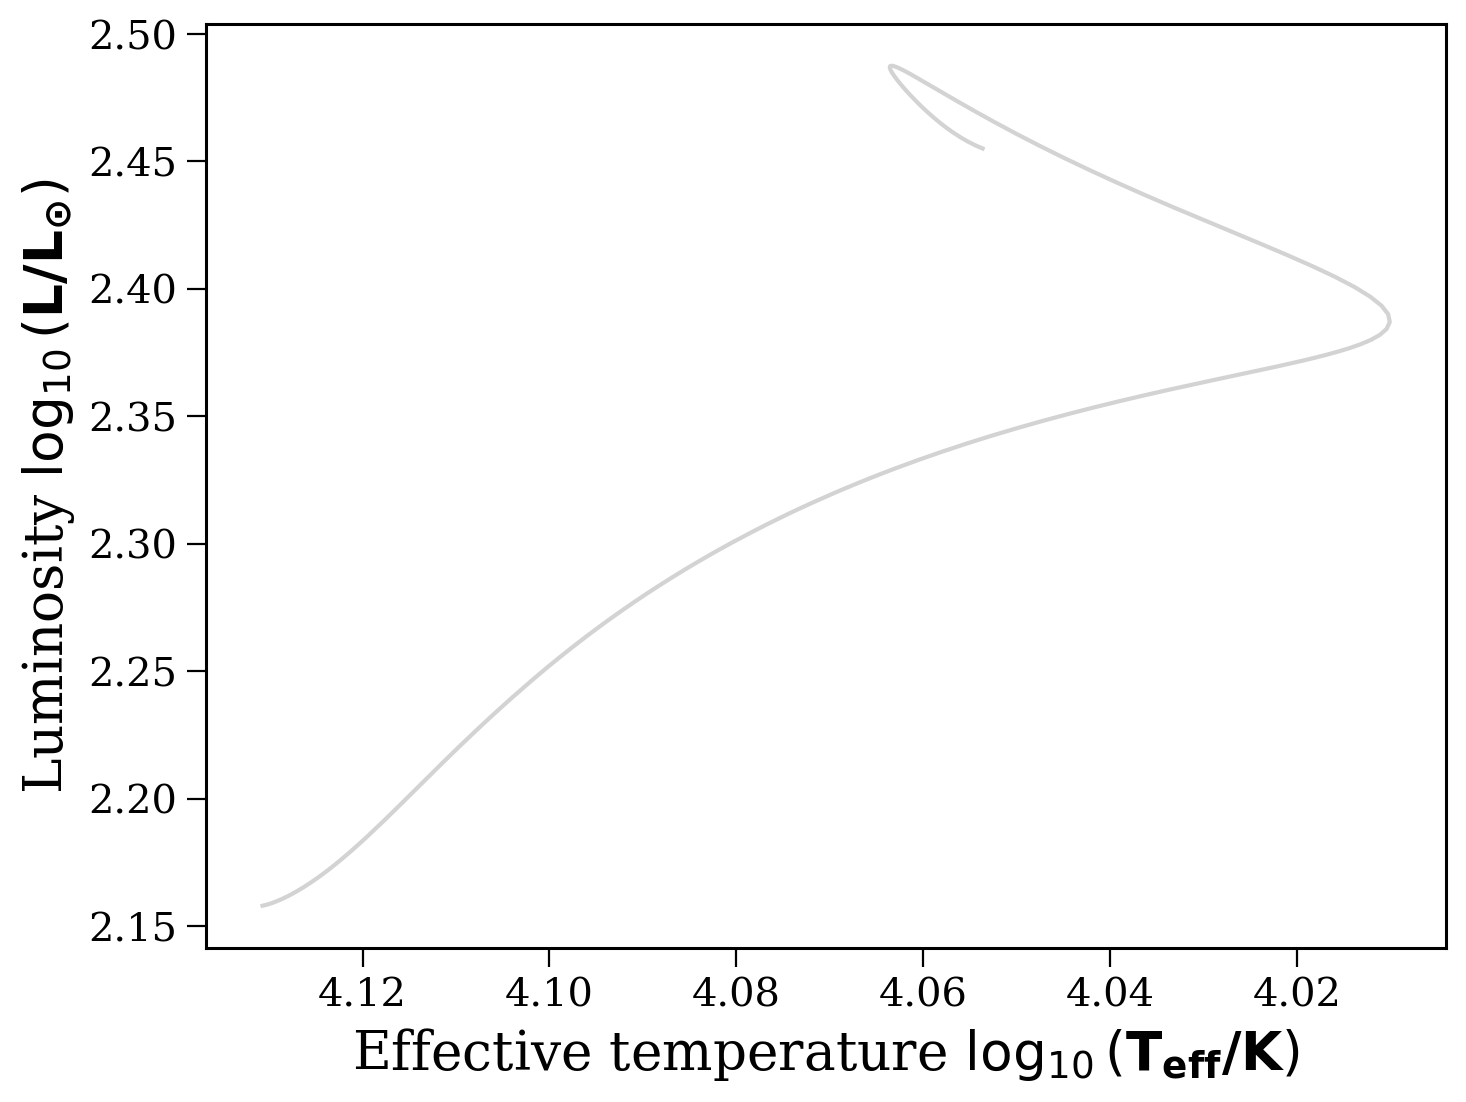

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='Effective temperature $\\log_{10}(\\mathbf{T_{eff}/K})$', ylabel='Luminosity $\\log_{10}(\\mathbf{L/L_{\\odot}})$'>)

In [137]:
mpt.simple_hr(single_tracks["M_3.5"], cbar_var=None, color="lightgrey", s=0)

In [23]:
def append_surface_He_abundance(track):
    surface_he = [track.profiles[i].iloc[0]["y_mass_fraction_He"] for i in range(len(track.profiles))]
    track.history.loc[:, "surface_he"] = surface_he

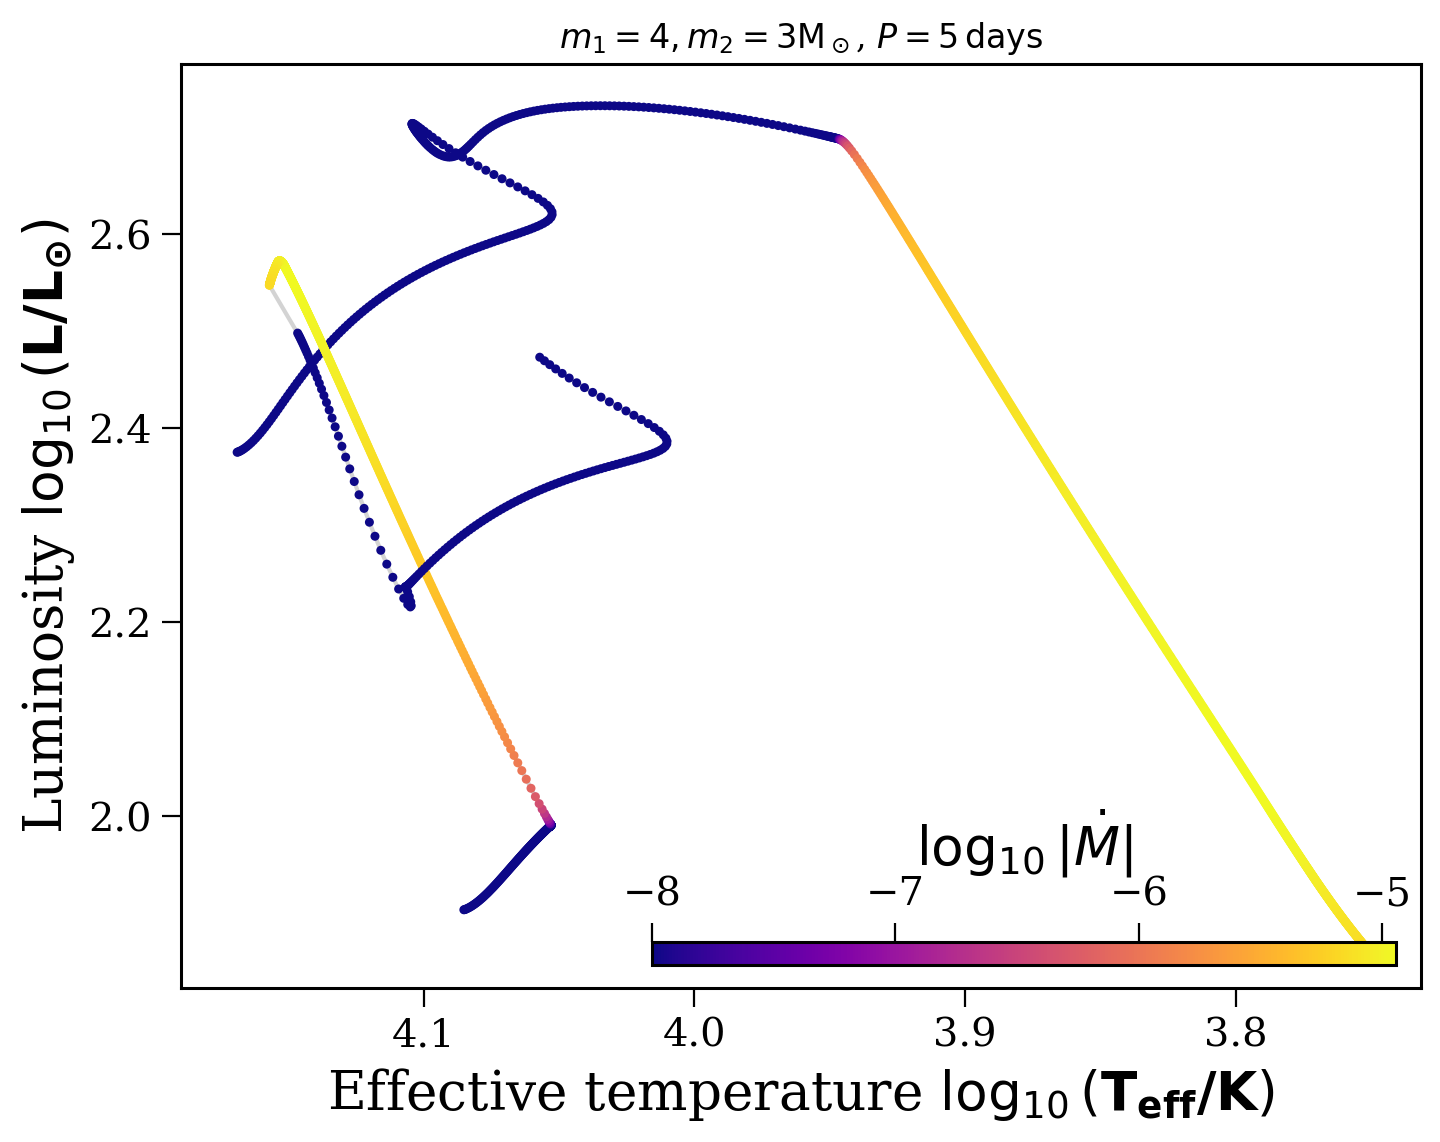

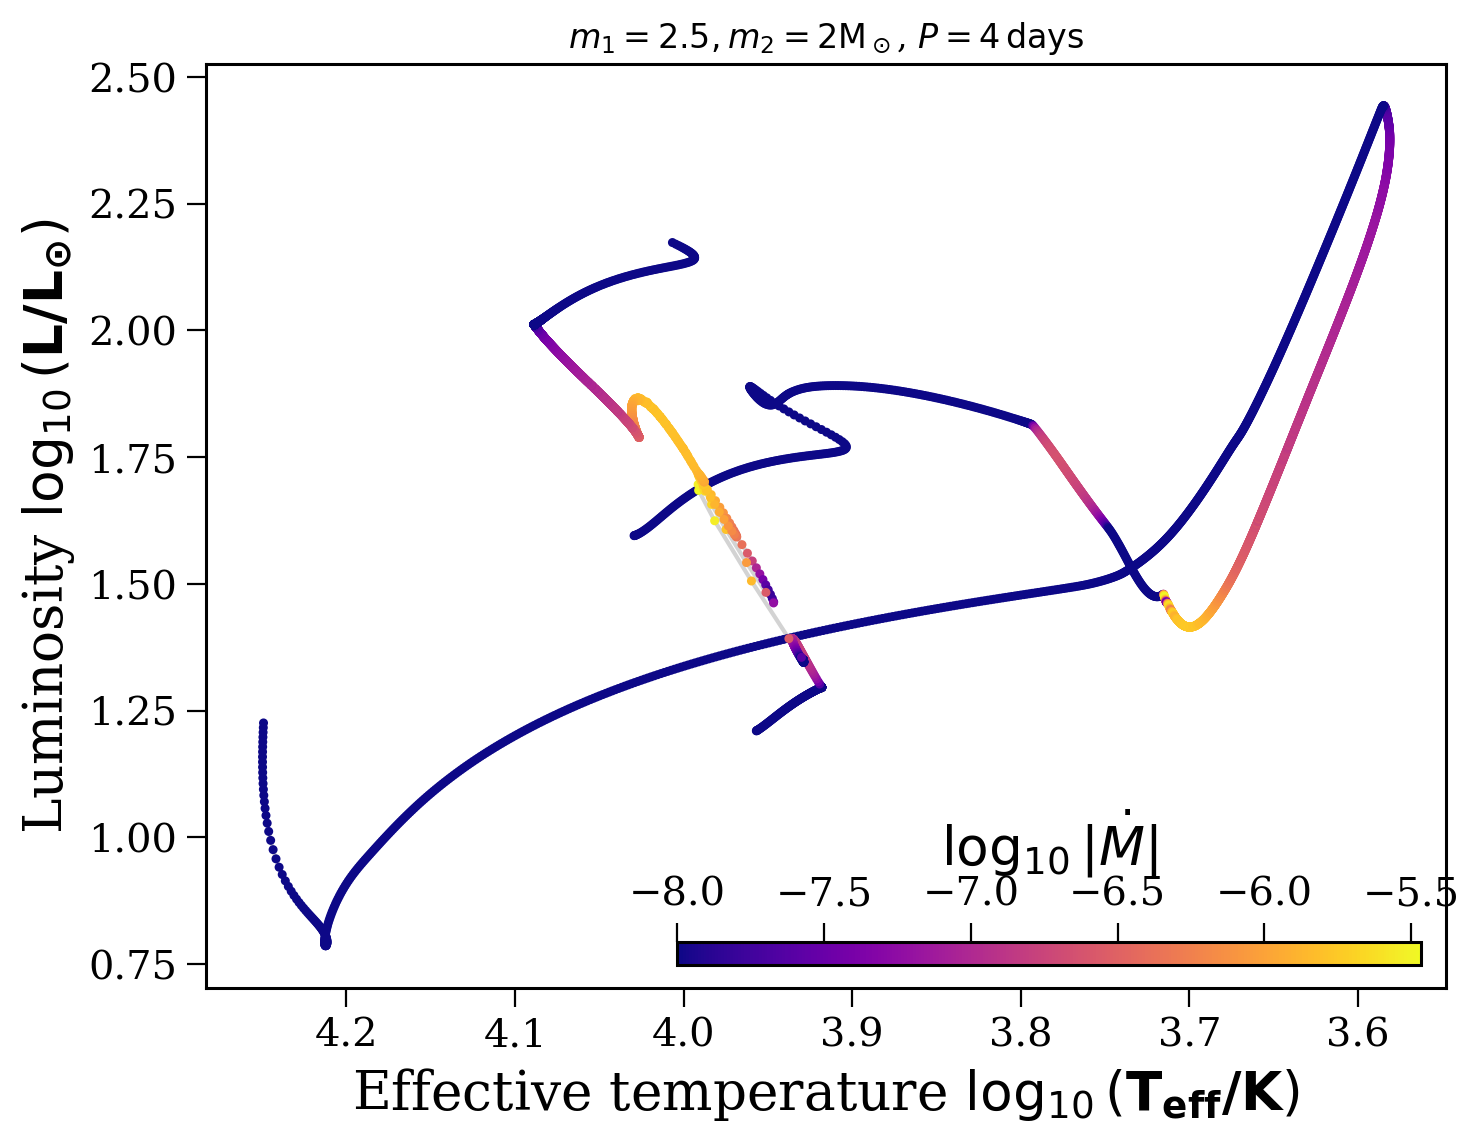

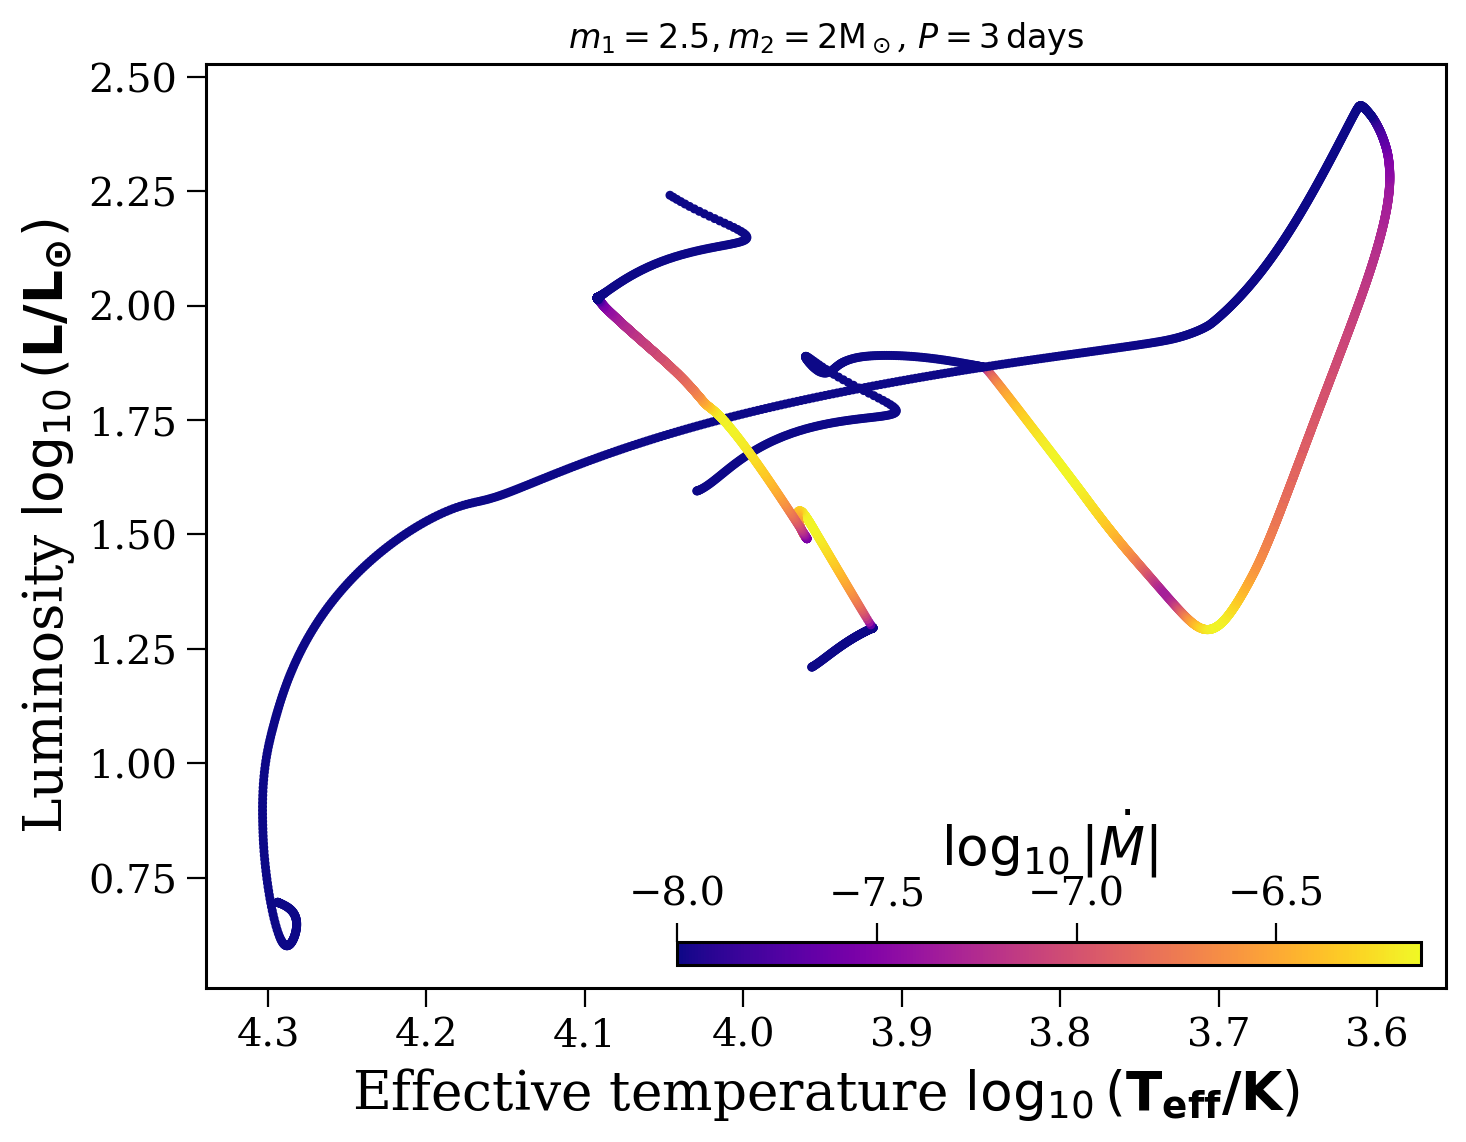

Parsing Donor


100%|██████████| 2655/2655 [00:29<00:00, 88.68it/s] 


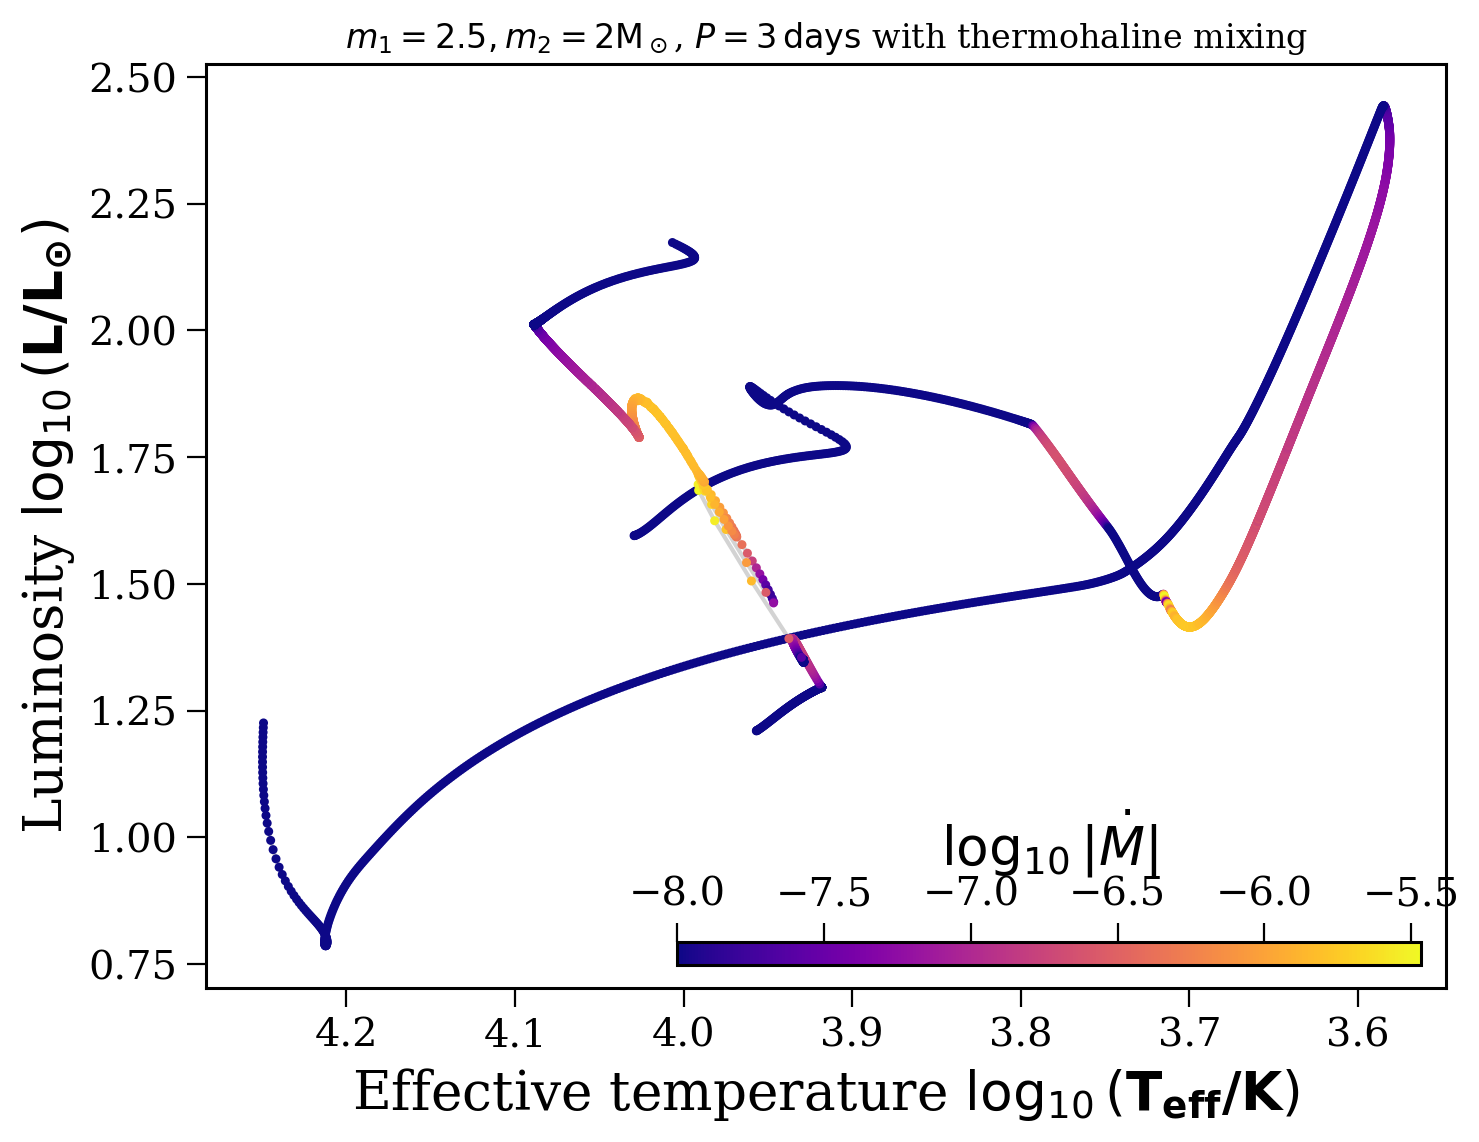

Parsing Donor


100%|██████████| 2957/2957 [00:34<00:00, 86.97it/s] 


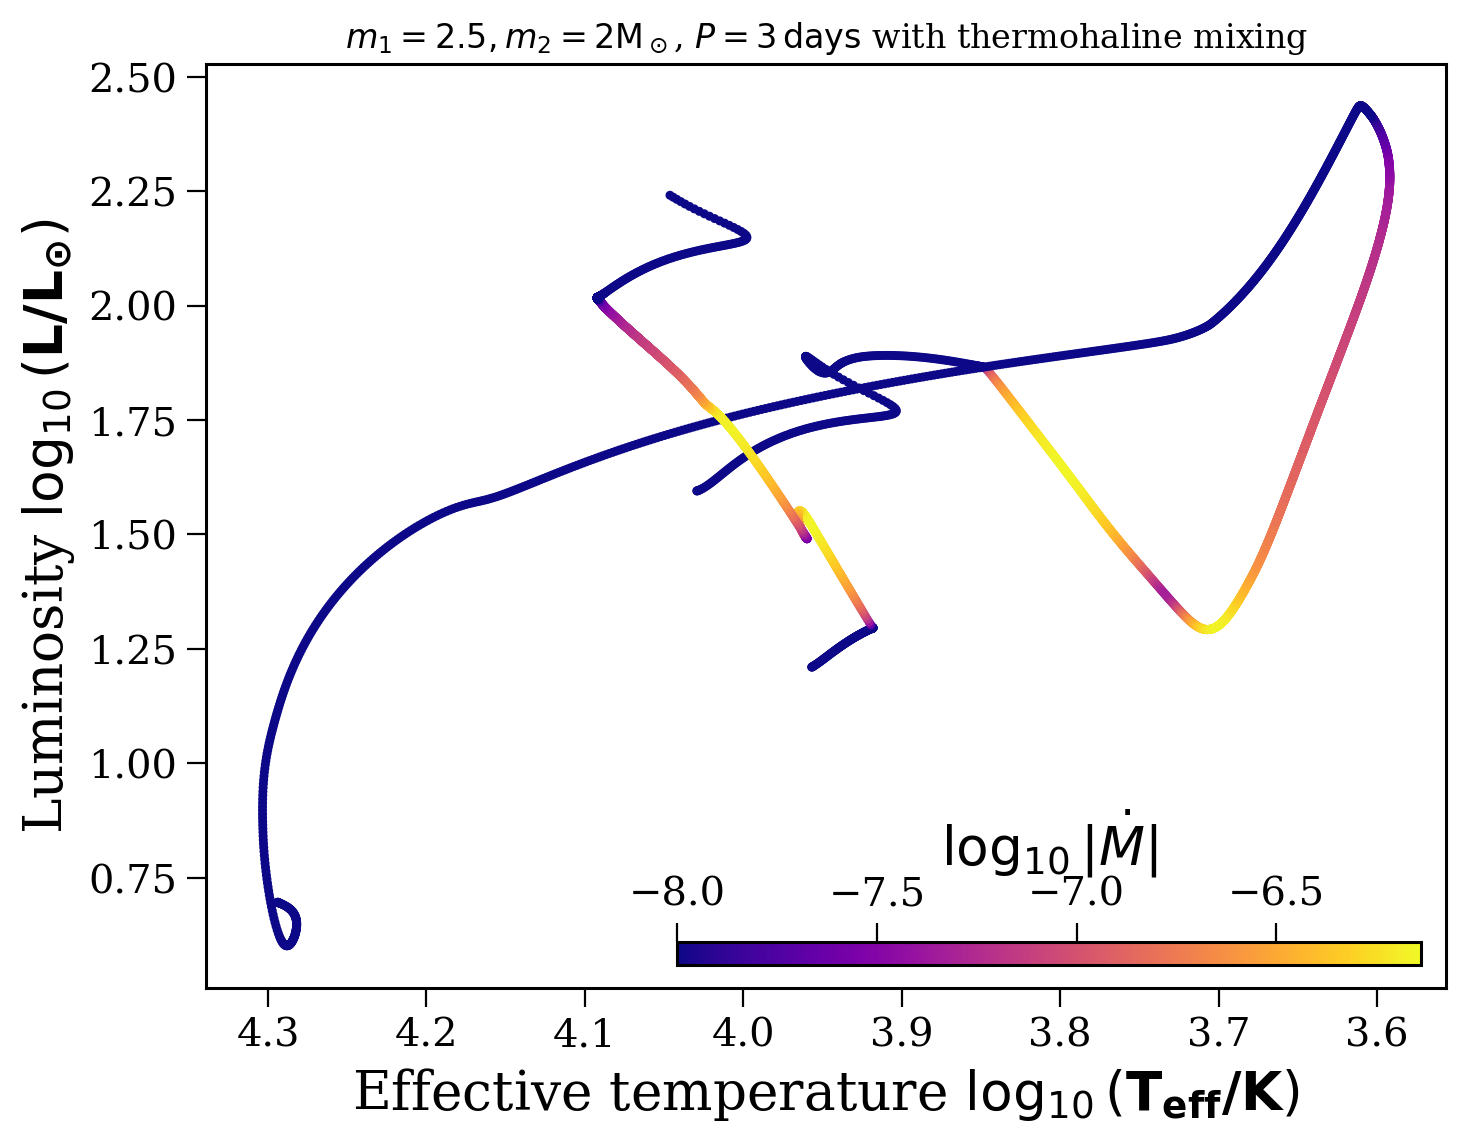

In [87]:
for folder, label in zip(["detach_4_3_5", "detach_2.5_2_4", "detach_2.5_2_3", "detach_2.5_2_4_tm", "detach_2.5_2_3_tm"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$ with thermohaline mixing",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$ with thermohaline mixing"]):
    t1, t2 = tracks[folder]

    fig, ax = None, None
    for track in tracks[folder]:
        if "surface_he" not in track.history.columns:
            append_surface_He_abundance(track)
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=5, cmap="plasma",
                                cbar_var="log_abs_mdot", cbar_label=r"$\log_{10} |\dot{M}|$", vmin=-8)#, vmin=0.275, vmax=0.385)
    ax.set_title(label)
    plt.show()

    # fig, ax = plt.subplots(figsize=(8, 4))

    # for t, l in zip([t1, t2], ["Donor", "Accretor"]):
    #     dXc = t.history["center_h1"].shift(1) - t.history["center_h1"]
    #     dXc.iloc[0] = dXc.iloc[1]

    
    #     ax.plot(t.history["model_number"], np.abs(dXc) / 10**(t.history["log_dt"]), label=l)
    # # ax.plot(t2.history["model_number"], t2.history["log_dt"])
    # ax.set_title(folder)
    # ax.set_yscale("log")
    # ax.legend()
    # ax.set_xlabel("Model Number")
    # ax.set_ylabel("dXc / dt [1/year]", fontsize=0.7*fs)
    # ax.set_ylim(1e-12)
    # plt.show()

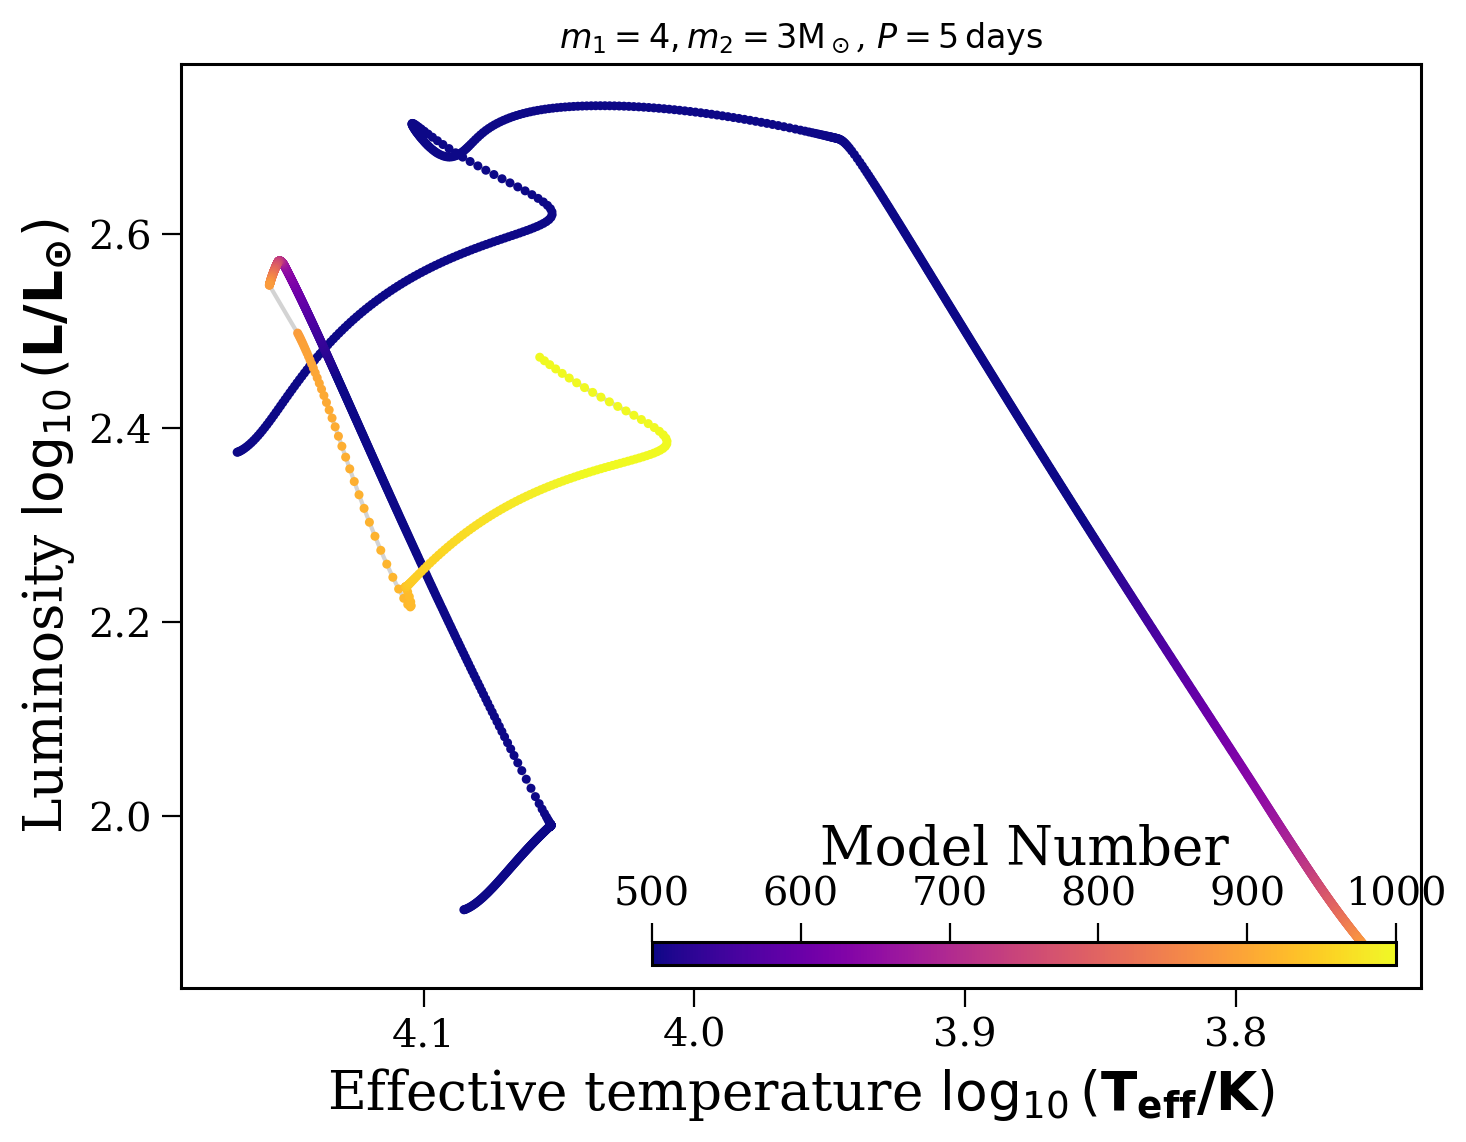

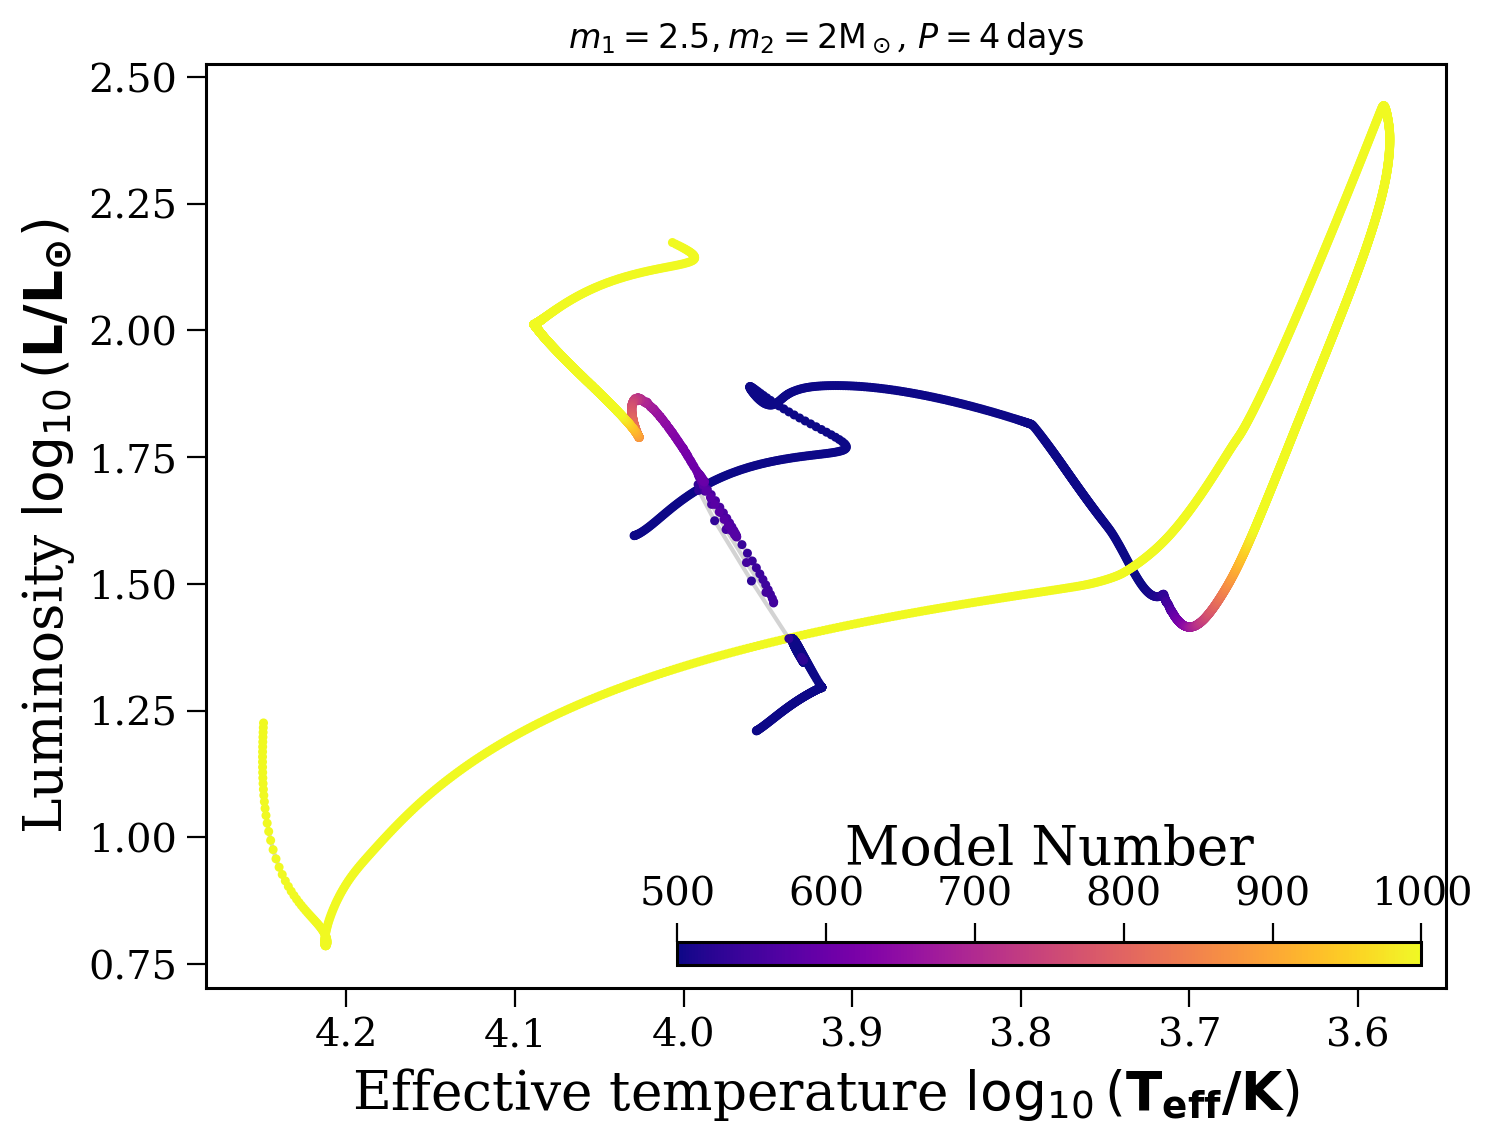

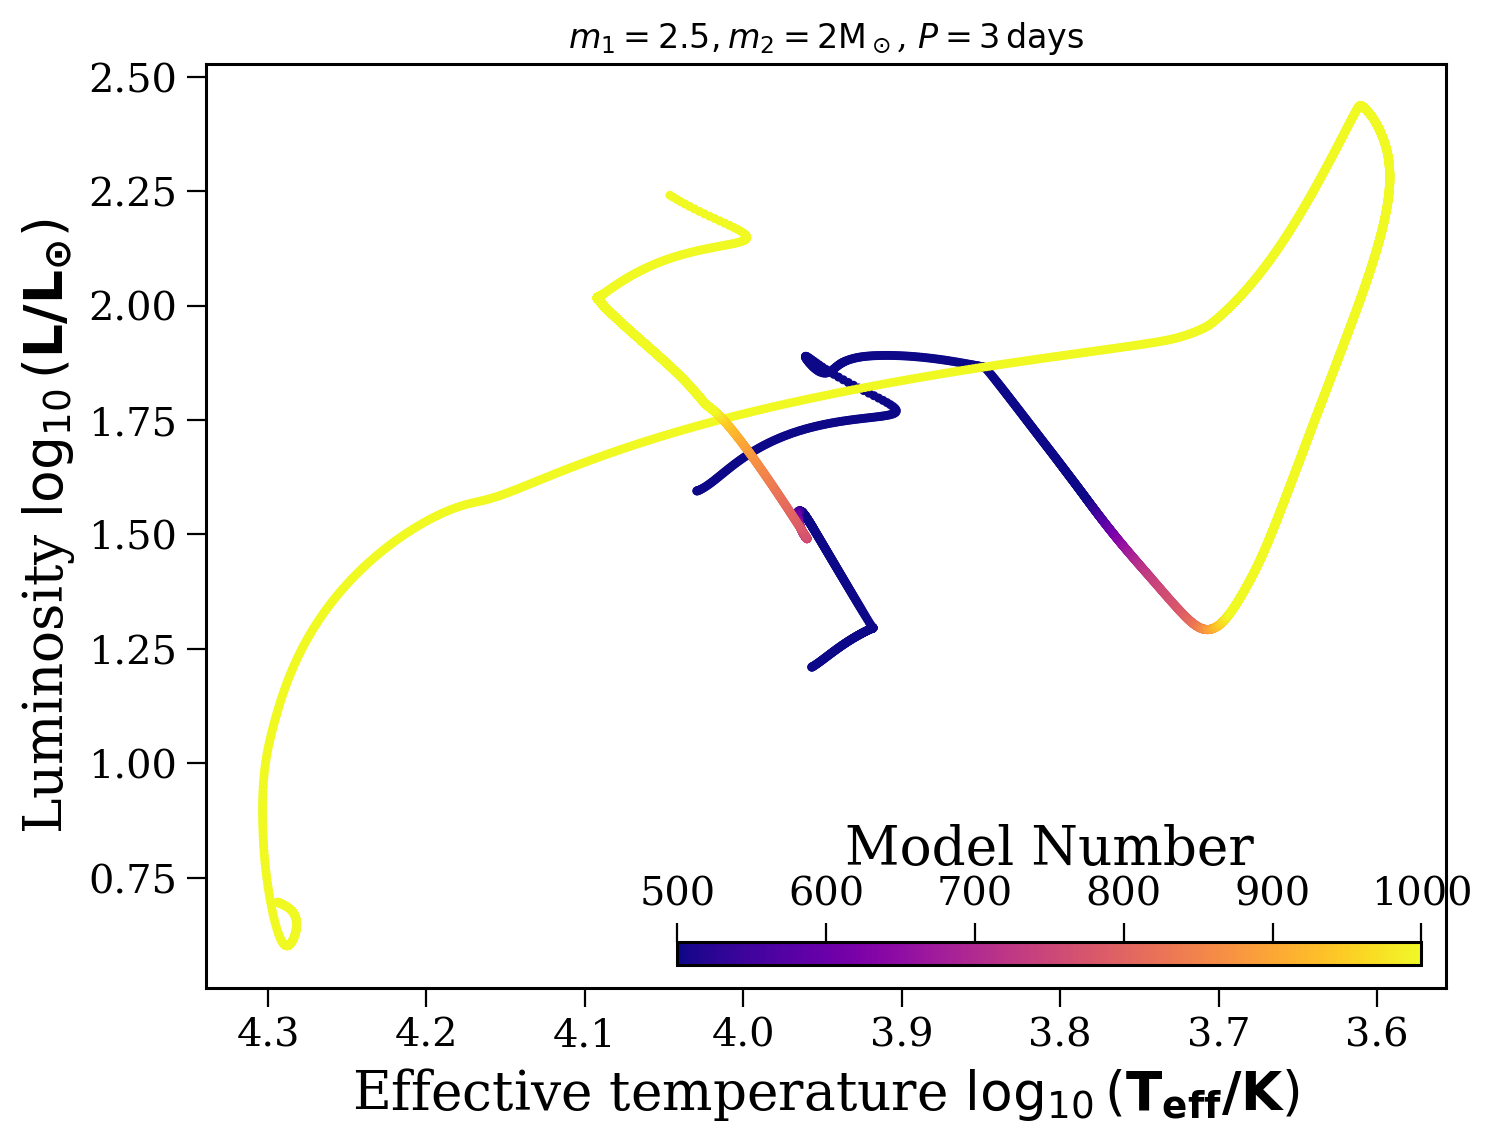

In [40]:
for folder, label in zip(["detach_4_3_5", "detach_2.5_2_4", "detach_2.5_2_3"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$"]):
    t1, t2 = tracks[folder]

    fig, ax = None, None
    for track in tracks[folder]:
        if "surface_he" not in track.history.columns:
            append_surface_He_abundance(track)
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=5, cmap="plasma",
                                cbar_var="model_number", cbar_label="Model Number", vmin=500, vmax=1000)#, vmin=0.275, vmax=0.385)
    ax.set_title(label)
    plt.show()

    # fig, ax = plt.subplots(figsize=(8, 4))

    # for t, l in zip([t1, t2], ["Donor", "Accretor"]):
    #     dXc = t.history["center_h1"].shift(1) - t.history["center_h1"]
    #     dXc.iloc[0] = dXc.iloc[1]

    
    #     ax.plot(t.history["model_number"], np.abs(dXc) / 10**(t.history["log_dt"]), label=l)
    # # ax.plot(t2.history["model_number"], t2.history["log_dt"])
    # ax.set_title(folder)
    # ax.set_yscale("log")
    # ax.legend()
    # ax.set_xlabel("Model Number")
    # ax.set_ylabel("dXc / dt [1/year]", fontsize=0.7*fs)
    # ax.set_ylim(1e-12)
    # plt.show()

In [21]:
append_surface_He_abundance(tracks["detach_2.5_2_3"][1])

In [6]:
def get_years_after_mod(track, mod, years, verbose=True):
    start_time = track.history.loc[mod - 1]["star_age"]
    end_time = start_time + years
    
    diff = np.abs(track.history["star_age"].values - end_time)
    argmin_diff = np.argmin(diff)
    
    actual_time_step = track.history["star_age"].values[np.argmin(diff)] - start_time

    if verbose:
        print(f"The closest time I can find is {actual_time_step / 1e3:1.2f} kyr after this model")
    
    return track.history["model_number"][argmin_diff]

In [88]:
def accretor_rel_MT(track, years=None, rel_to="start", extra_title=None, verbose=False):

    if rel_to == "both":
        accretor_rel_MT(track, years=years, rel_to="start", extra_title=extra_title)
        accretor_rel_MT(track, years=years, rel_to="end", extra_title=extra_title)
        return

    mt_mod_nums = track.history[track.history["log_abs_mdot"] > -10.0]["model_number"]
    mt_start, mt_end = mt_mod_nums.min(), mt_mod_nums.max()

    if years is None:
        if rel_to == "start":
            t_start, t_end = track.history.loc[mt_start - 1]["star_age"], track.history.loc[mt_end - 1]["star_age"]
            years = np.linspace(t_start, t_end, 5) - t_start
        else:
            t_start, t_end = track.history.loc[mt_end - 1]["star_age"], track.history.iloc[-1]["star_age"]
            years = np.linspace(t_start, t_end, 5) - t_start

    fig, axes = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={"width_ratios": [16, 1]})
    fig.subplots_adjust(wspace=0.0)

    ax, cbar_ax = axes

    cmap = plt.get_cmap("cividis_r")

    colours = cmap(np.linspace(0, 1, len(years)))
    inds = range(len(years))

    for year, col, ind in zip(years, colours, inds):
        mod = get_years_after_mod(track, mt_start if rel_to == "start" else mt_end, year, verbose=verbose)
        ax.plot(track.profiles[mod - 1]["mass"], track.profiles[mod - 1]["x_mass_fraction_H"], color=col,
                zorder=10 + len(years) - ind)# if rel_to == "start" else None)
    ax.set_ylim(0, 1)

    norm = mpl.colors.Normalize(vmin=min(years) / 1e6, vmax=max(years) / 1e6)

    cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm)
    cb1.ax.tick_params(labelsize=0.5*fs)
    cb1.set_label(f"Time after mass\ntransfer f{'starts' if rel_to == 'start' else 'ends'} [Myr]", fontsize=0.5*fs)

    ax.set_xlabel(r"Mass $\mathbf{M/M_{\odot}}$")
    ax.set_ylabel(r"Hydrogren mass fraction", fontsize=0.5*fs)

    title = f"Accretor composition ({'During' if rel_to == 'start' else 'Post'} MT)"
    title = title + f" - {extra_title}" if extra_title is not None else title
    ax.set_title(title)

    plt.show()

(-8.0, -5.0)

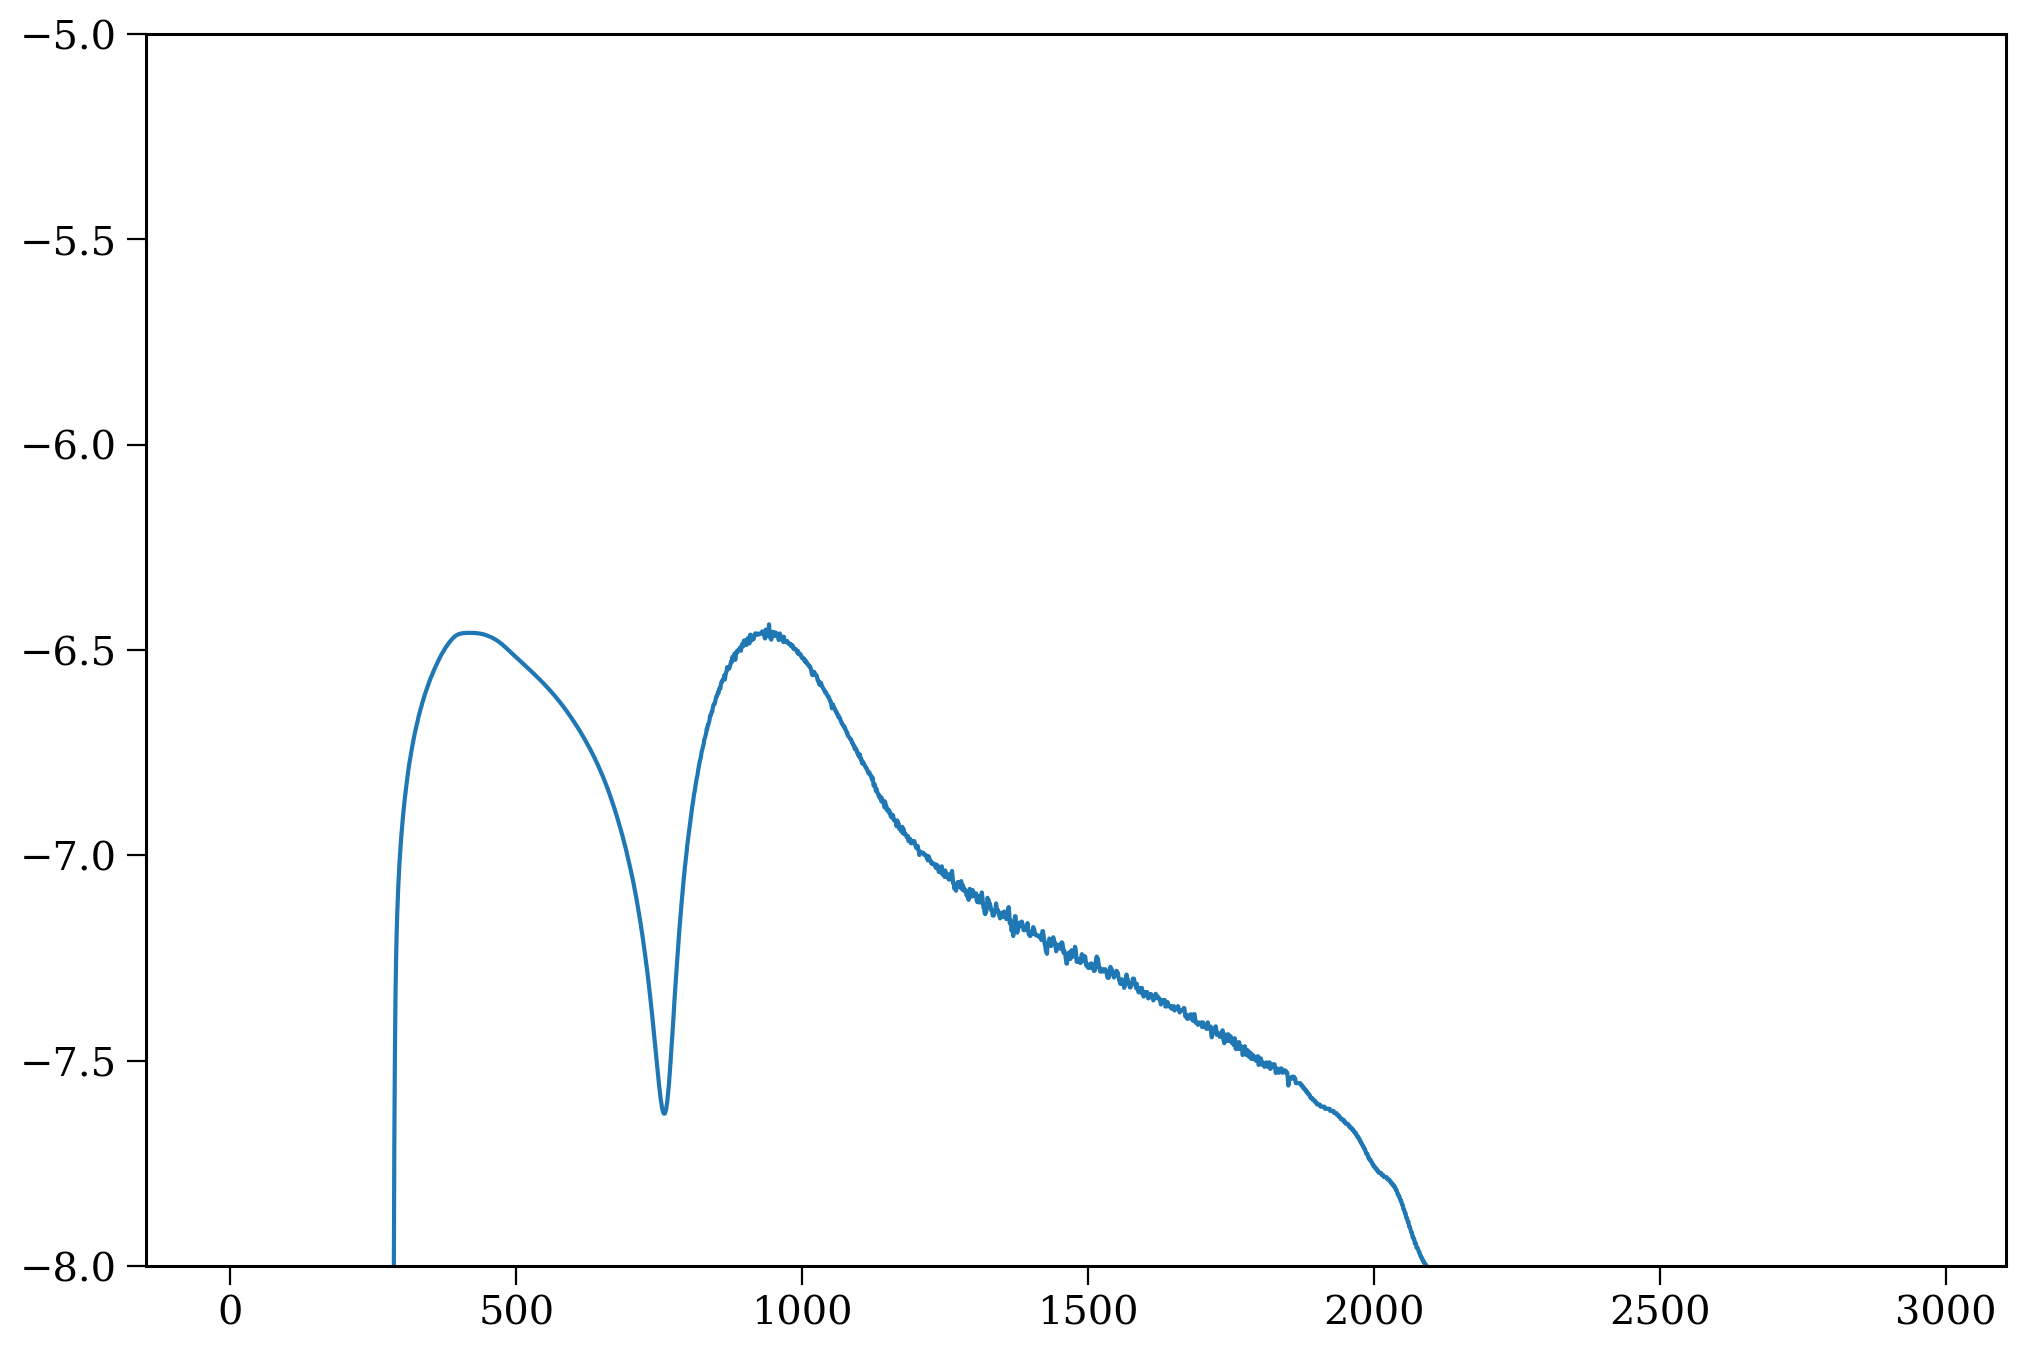

In [94]:
plt.plot(tracks["detach_2.5_2_3_tm"][1].history["model_number"], tracks["detach_2.5_2_3_tm"][1].history["log_abs_mdot"])
plt.ylim(-8, -5)

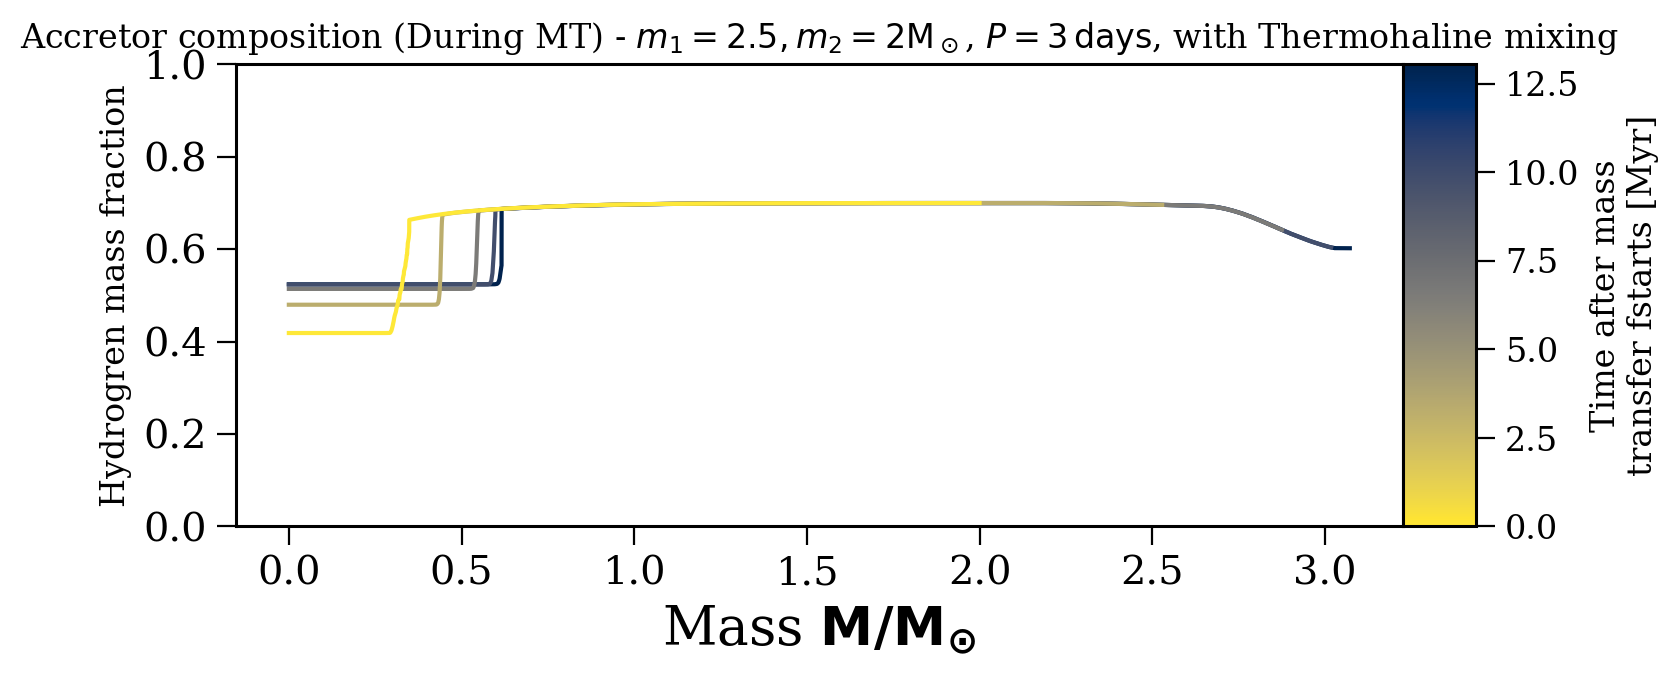

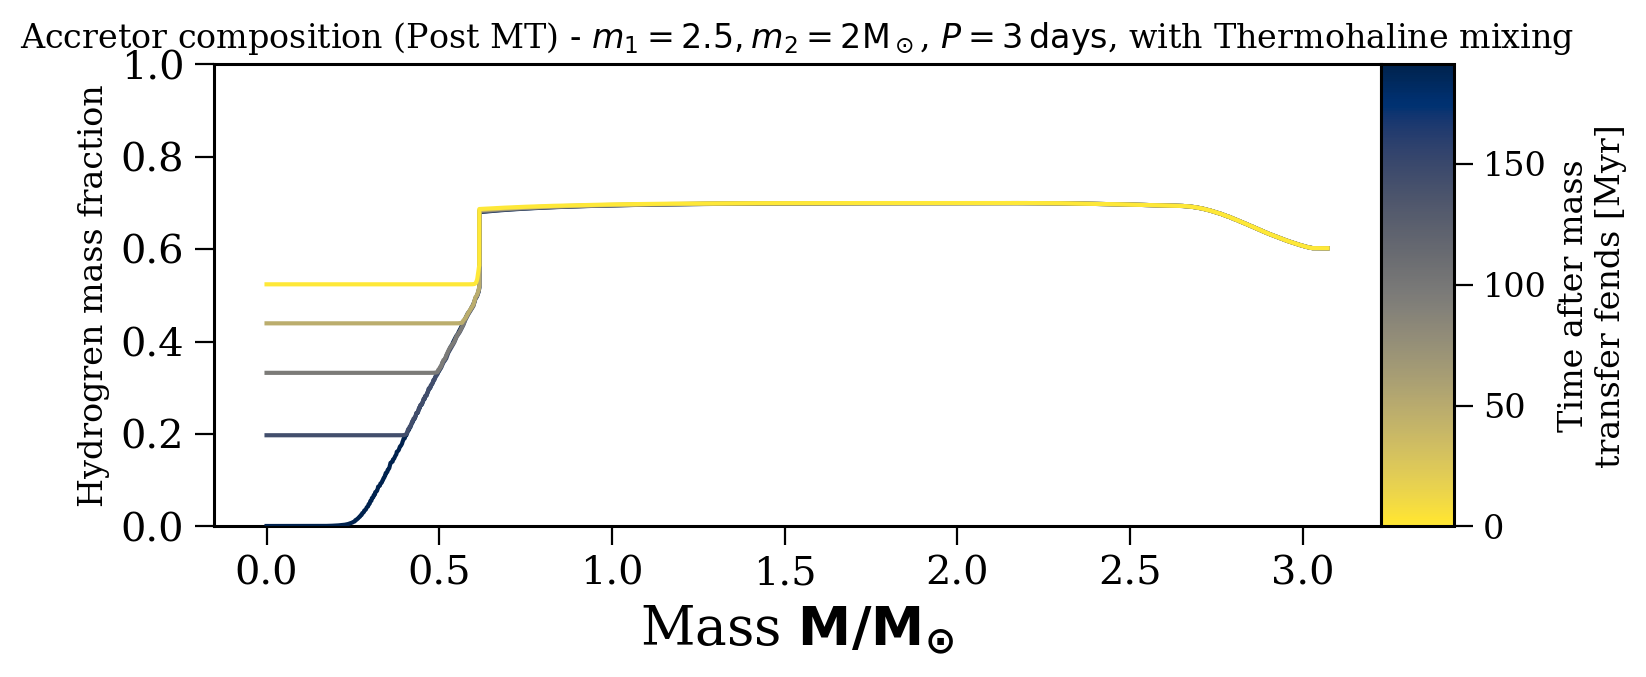

In [89]:
accretor_rel_MT(tracks["detach_2.5_2_3_tm"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$, with Thermohaline mixing")

Parsing Accretor


100%|██████████| 2655/2655 [00:24<00:00, 109.98it/s]


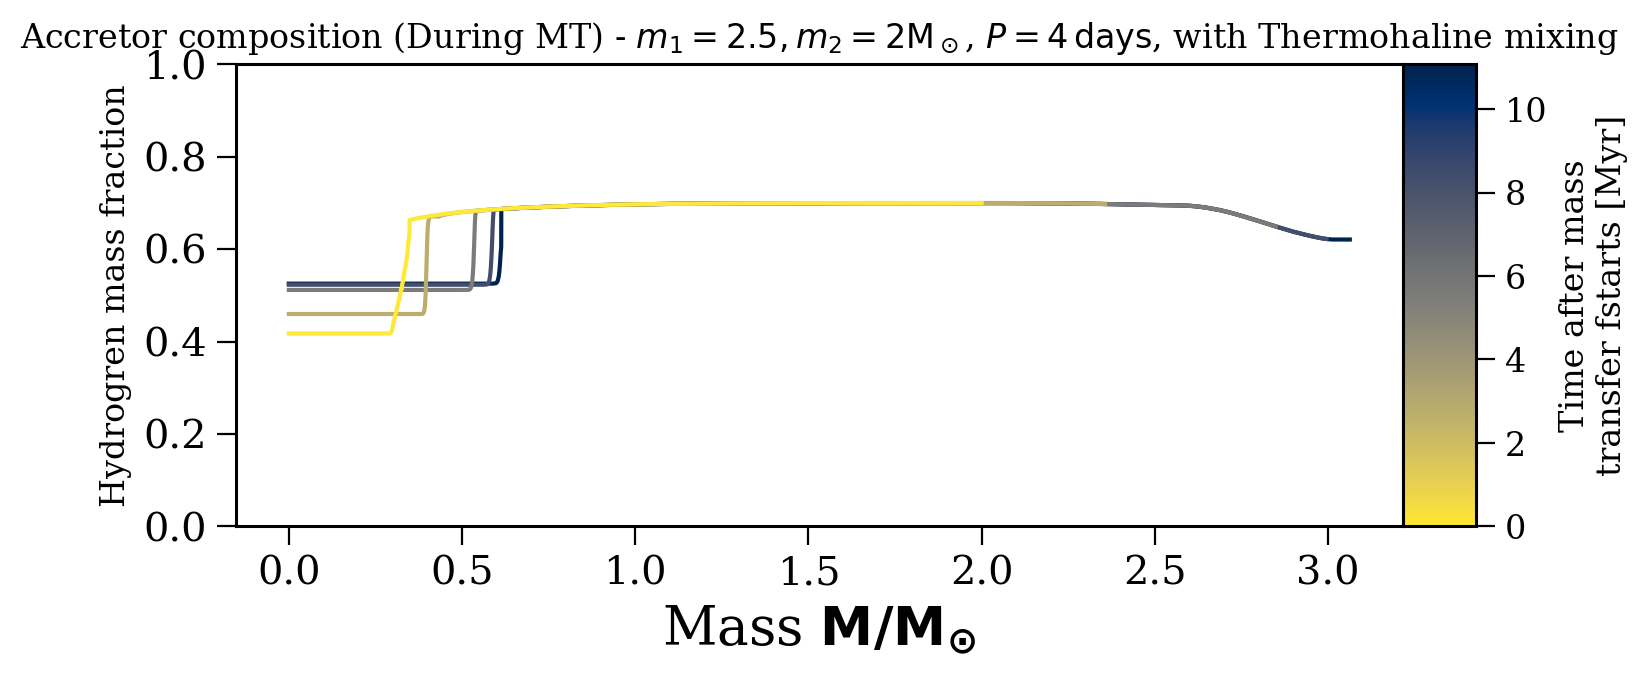

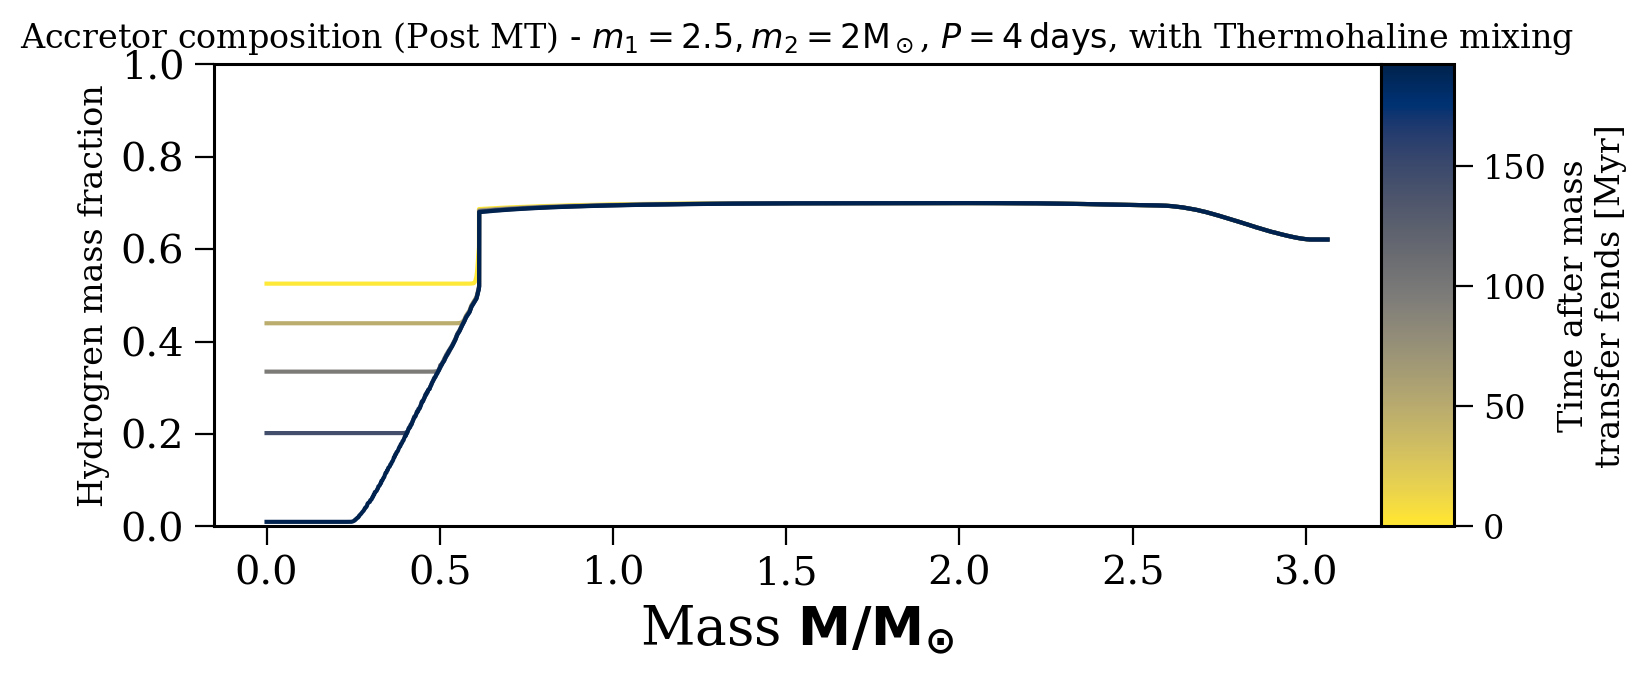

In [85]:
accretor_rel_MT(tracks["detach_2.5_2_4_tm"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$, with Thermohaline mixing")

100%|██████████| 2957/2957 [00:11<00:00, 256.73it/s]


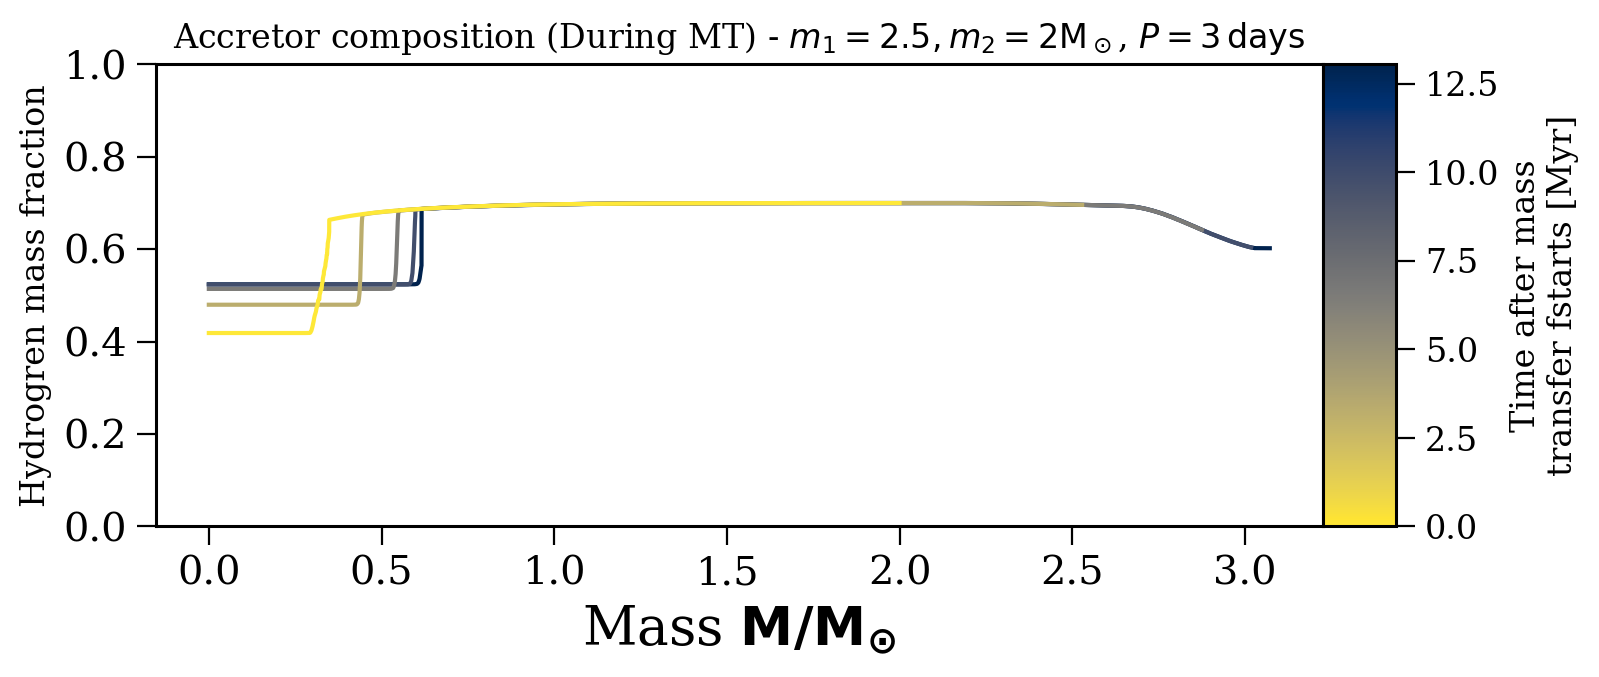

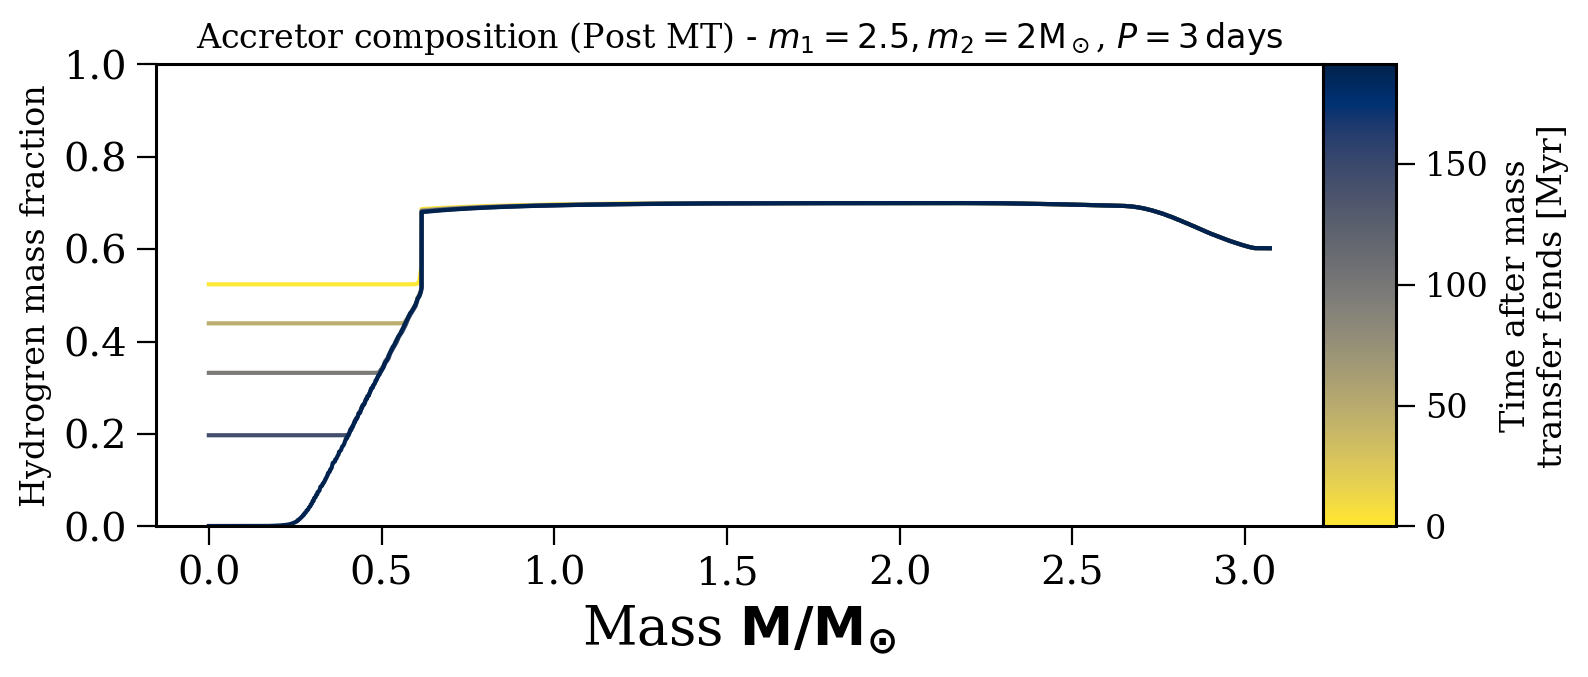

In [8]:
accretor_rel_MT(tracks["detach_2.5_2_3"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$")

100%|██████████| 2655/2655 [00:10<00:00, 251.73it/s]


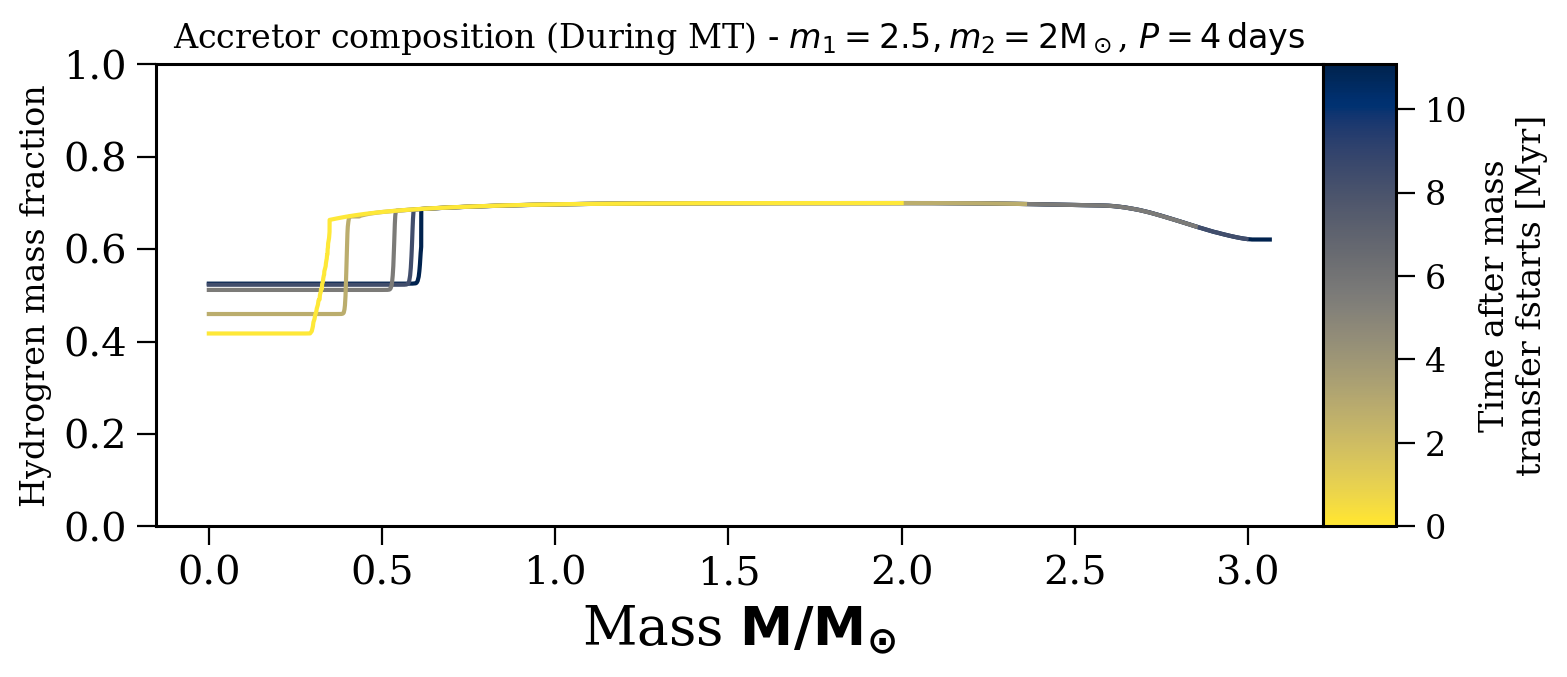

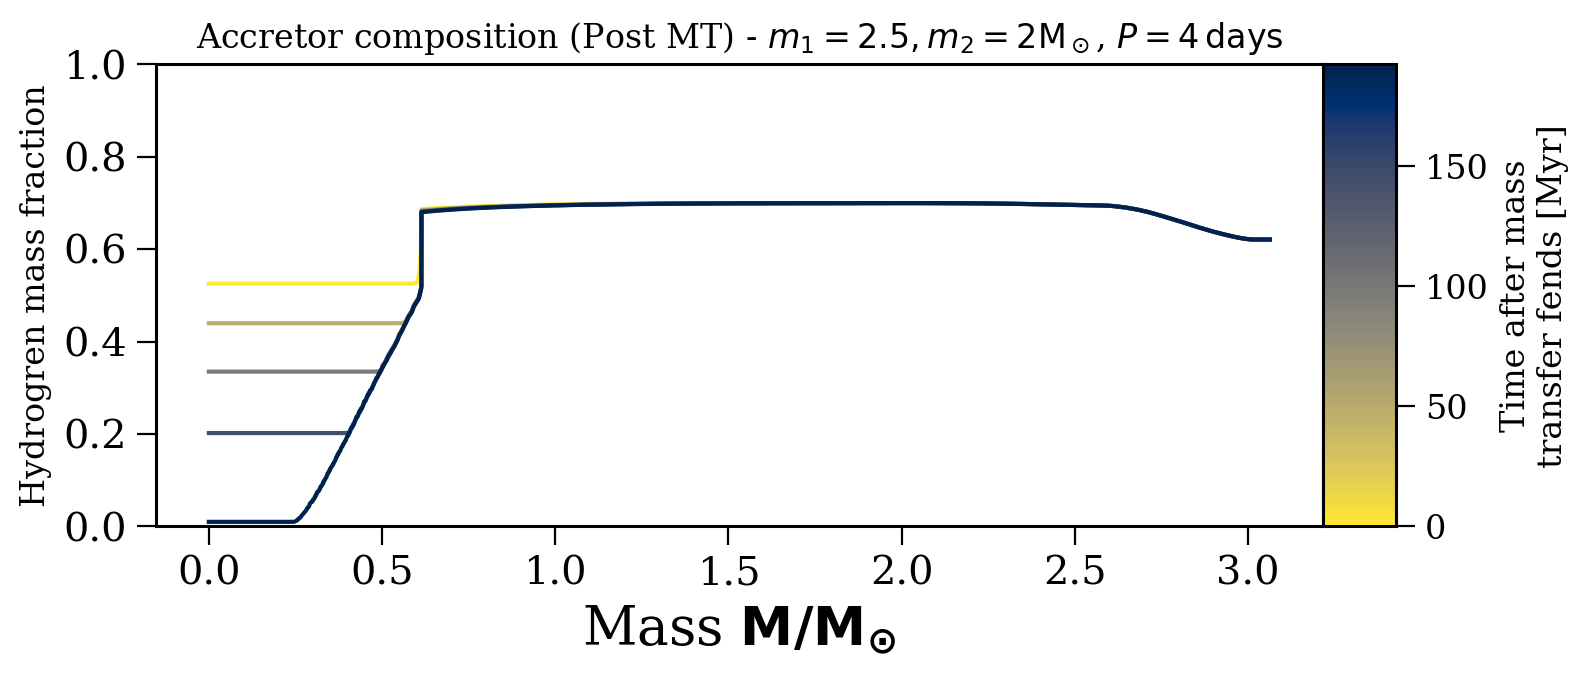

In [9]:
accretor_rel_MT(tracks["detach_2.5_2_4"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$")

  0%|          | 0/1044 [00:00<?, ?it/s]

100%|██████████| 1044/1044 [00:09<00:00, 115.79it/s]


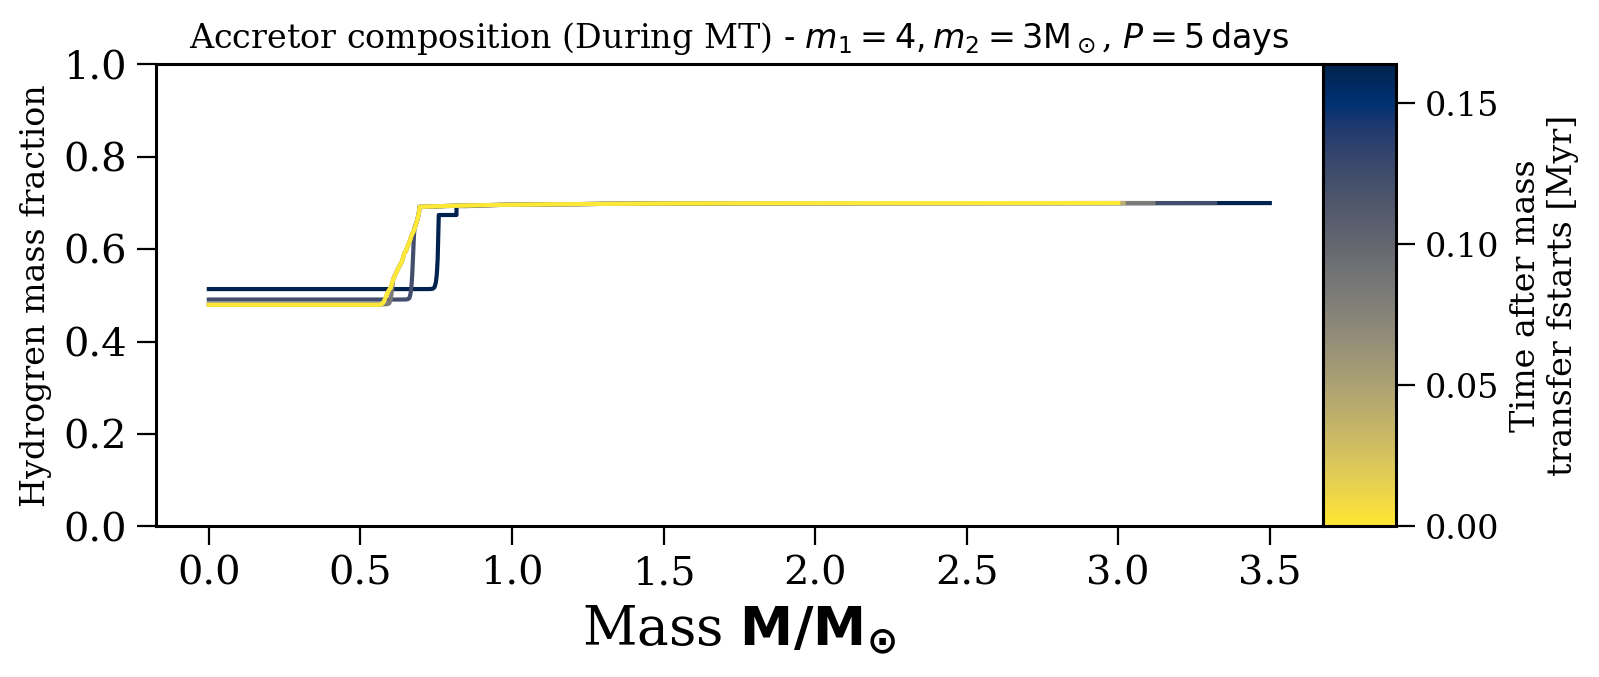

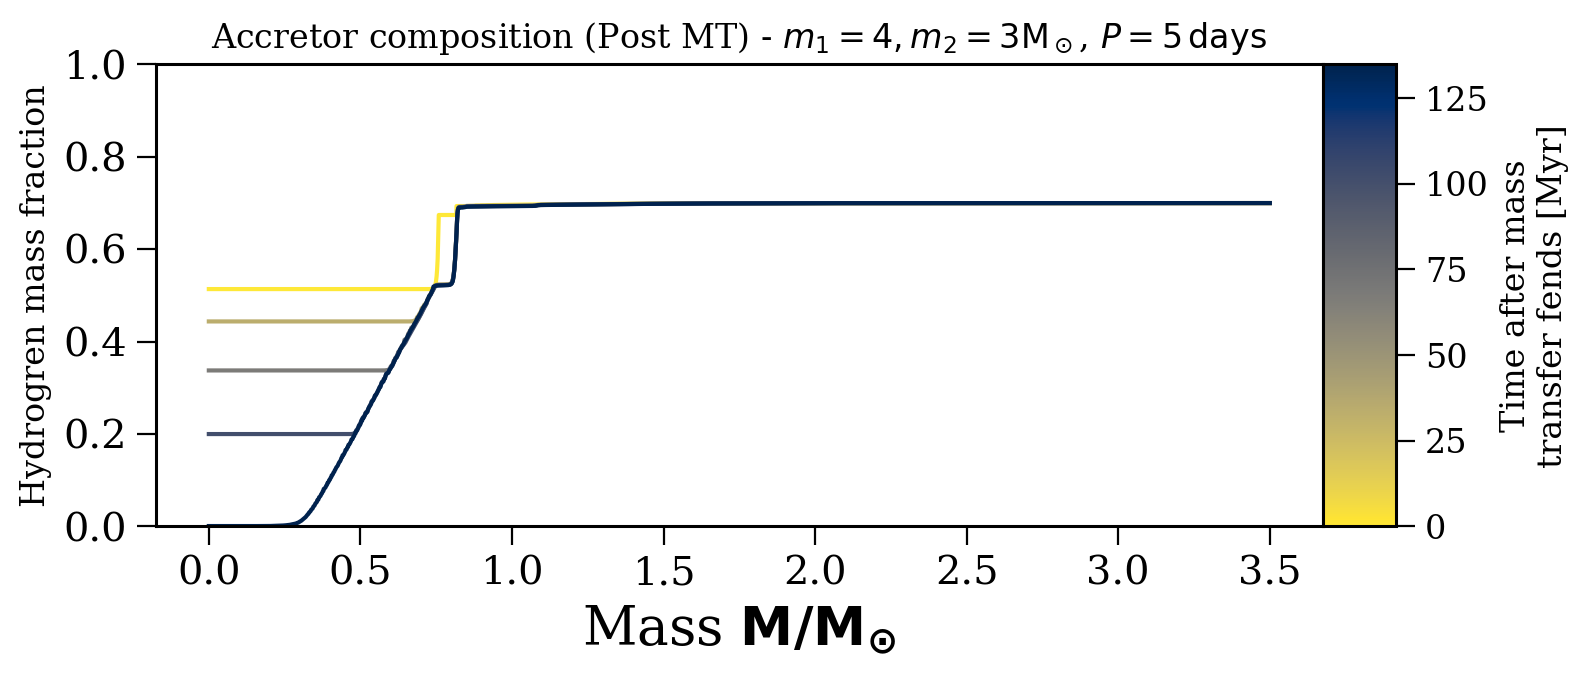

In [10]:
accretor_rel_MT(tracks["detach_4_3_5"][1], rel_to="both",
                extra_title=r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$")

In [44]:
track.history.columns[100:]

Index(['burn_qtop_10', 'burn_type_11', 'burn_qtop_11', 'burn_type_12',
       'burn_qtop_12', 'burn_type_13', 'burn_qtop_13', 'burn_type_14',
       'burn_qtop_14', 'burn_type_15', 'burn_qtop_15', 'burn_type_16',
       'burn_qtop_16', 'burn_type_17', 'burn_qtop_17', 'burn_type_18',
       'burn_qtop_18', 'burn_type_19', 'burn_qtop_19', 'burn_type_20',
       'burn_qtop_20', 'burn_type_21', 'burn_qtop_21', 'burn_type_22',
       'burn_qtop_22', 'burn_type_23', 'burn_qtop_23', 'burn_type_24',
       'burn_qtop_24', 'burn_type_25', 'burn_qtop_25', 'he_core_mass',
       'co_core_mass', 'one_core_mass', 'fe_core_mass',
       'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R', 'log_g',
       'v_div_csound_surf', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T',
       'center_mu', 'center_ye', 'center_abar', 'center_h1', 'center_he4',
       'center_c12', 'center_o16', 'surface_c12', 'surface_o16',
       'total_mass_h1', 'total_mass_he4', 'num_retries', 'num_iters',
       'model_number.1

In [55]:
from scipy.interpolate import interp1d

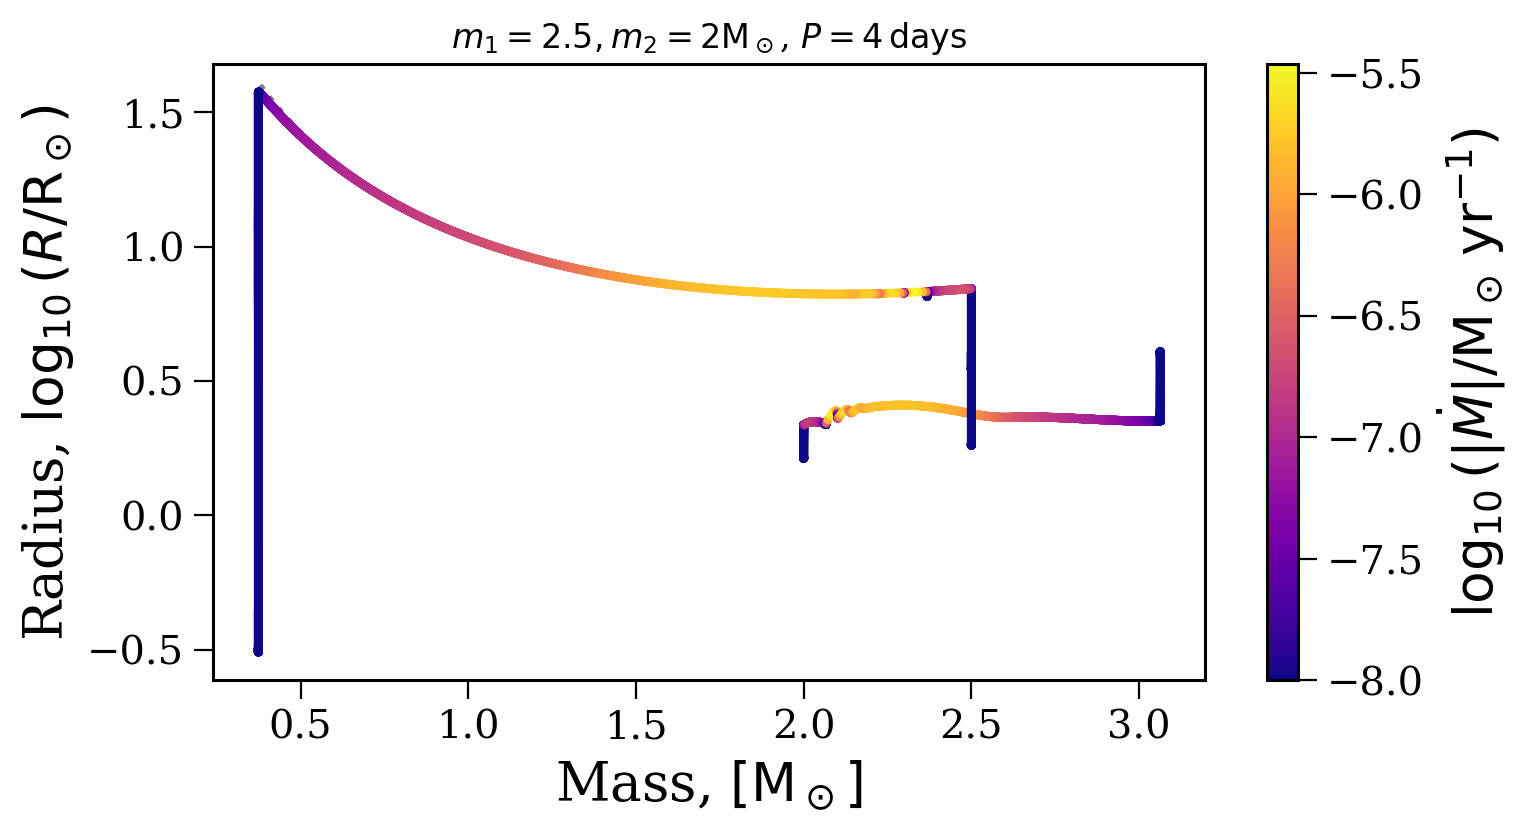

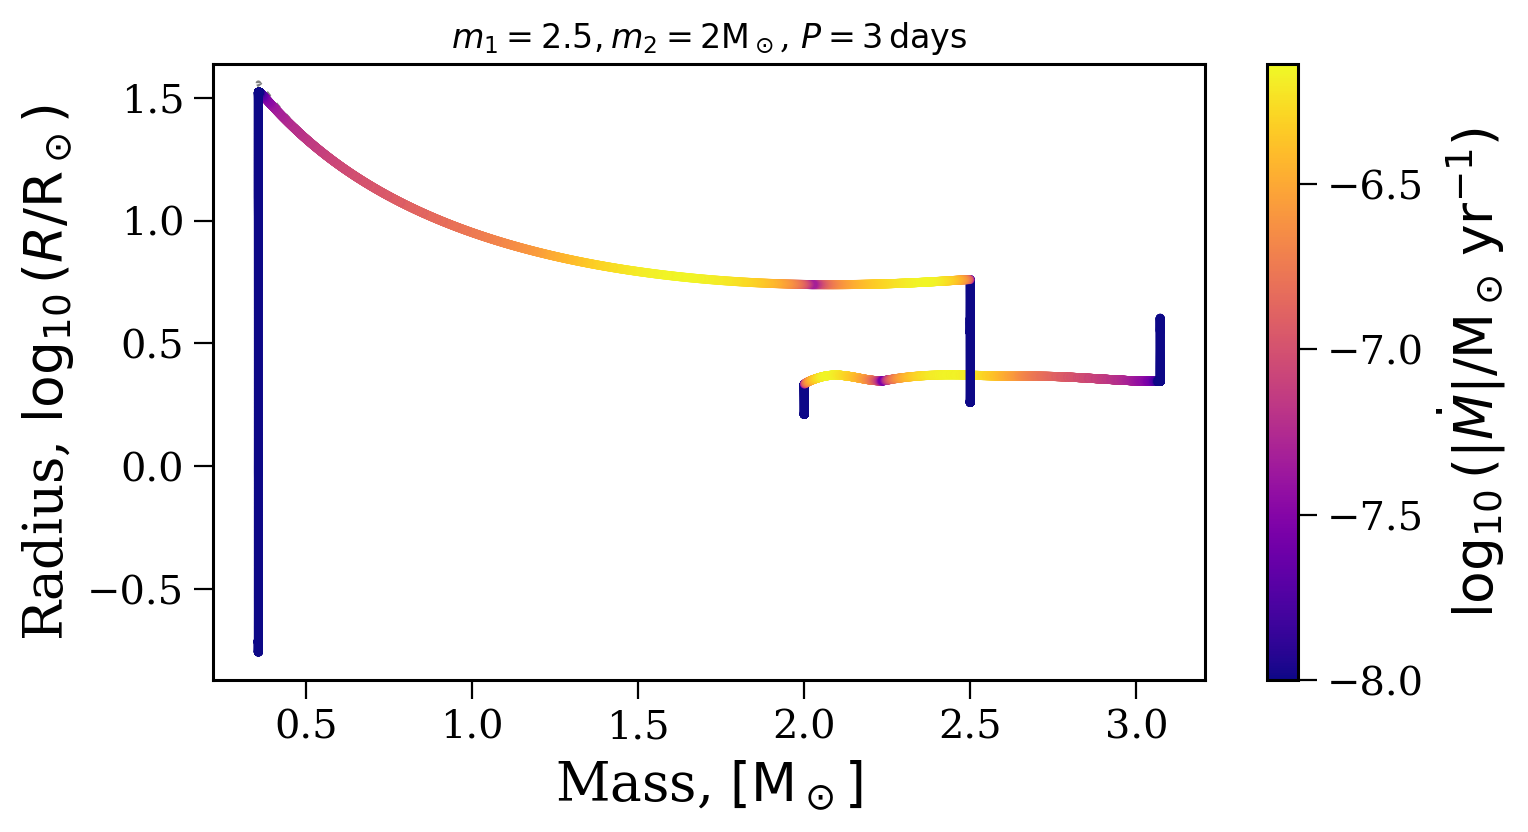

In [78]:
for folder, label in zip(["detach_2.5_2_4", "detach_2.5_2_3"],
                         [r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$"]):
    fig, ax = plt.subplots(figsize=(8, 4))
    for track in reversed(list(tracks[folder])):
        scatter = ax.scatter(track.history["star_mass"], track.history["log_R"], c=track.history["log_abs_mdot"],
                            vmin=-8, s=5, cmap="plasma")

    cbar = fig.colorbar(scatter, label=r"$\log_{10} (|\dot{M}| / {\rm M_\odot \, yr^{-1}})$")

    ylims = ax.get_ylim()

    ax.plot(track.history["star_mass"], np.log10(track.history["rl_1"]), color="grey", linestyle="dotted", lw=2, zorder=-1)
    ax.set_ylim(ylims)

    ax.set_xlabel(r"Mass, $[\rm M_\odot]$")
    ax.set_ylabel(r"Radius, $\log_{10} (R / {\rm R_\odot})$")

    ax.set_title(label)
    plt.show()

# Kippenhahns

In [95]:
import mesaPlot as mp
m=mp.MESA()
p=mp.plot()

In [103]:
m.log_fold='../output/cluster/binaries/detachers/2.5_2_3/LOGS_star1'
m.loadHistory()

In [104]:
m.hist["model_number"]

array([   1,    2,    3, ..., 2955, 2956, 2957])

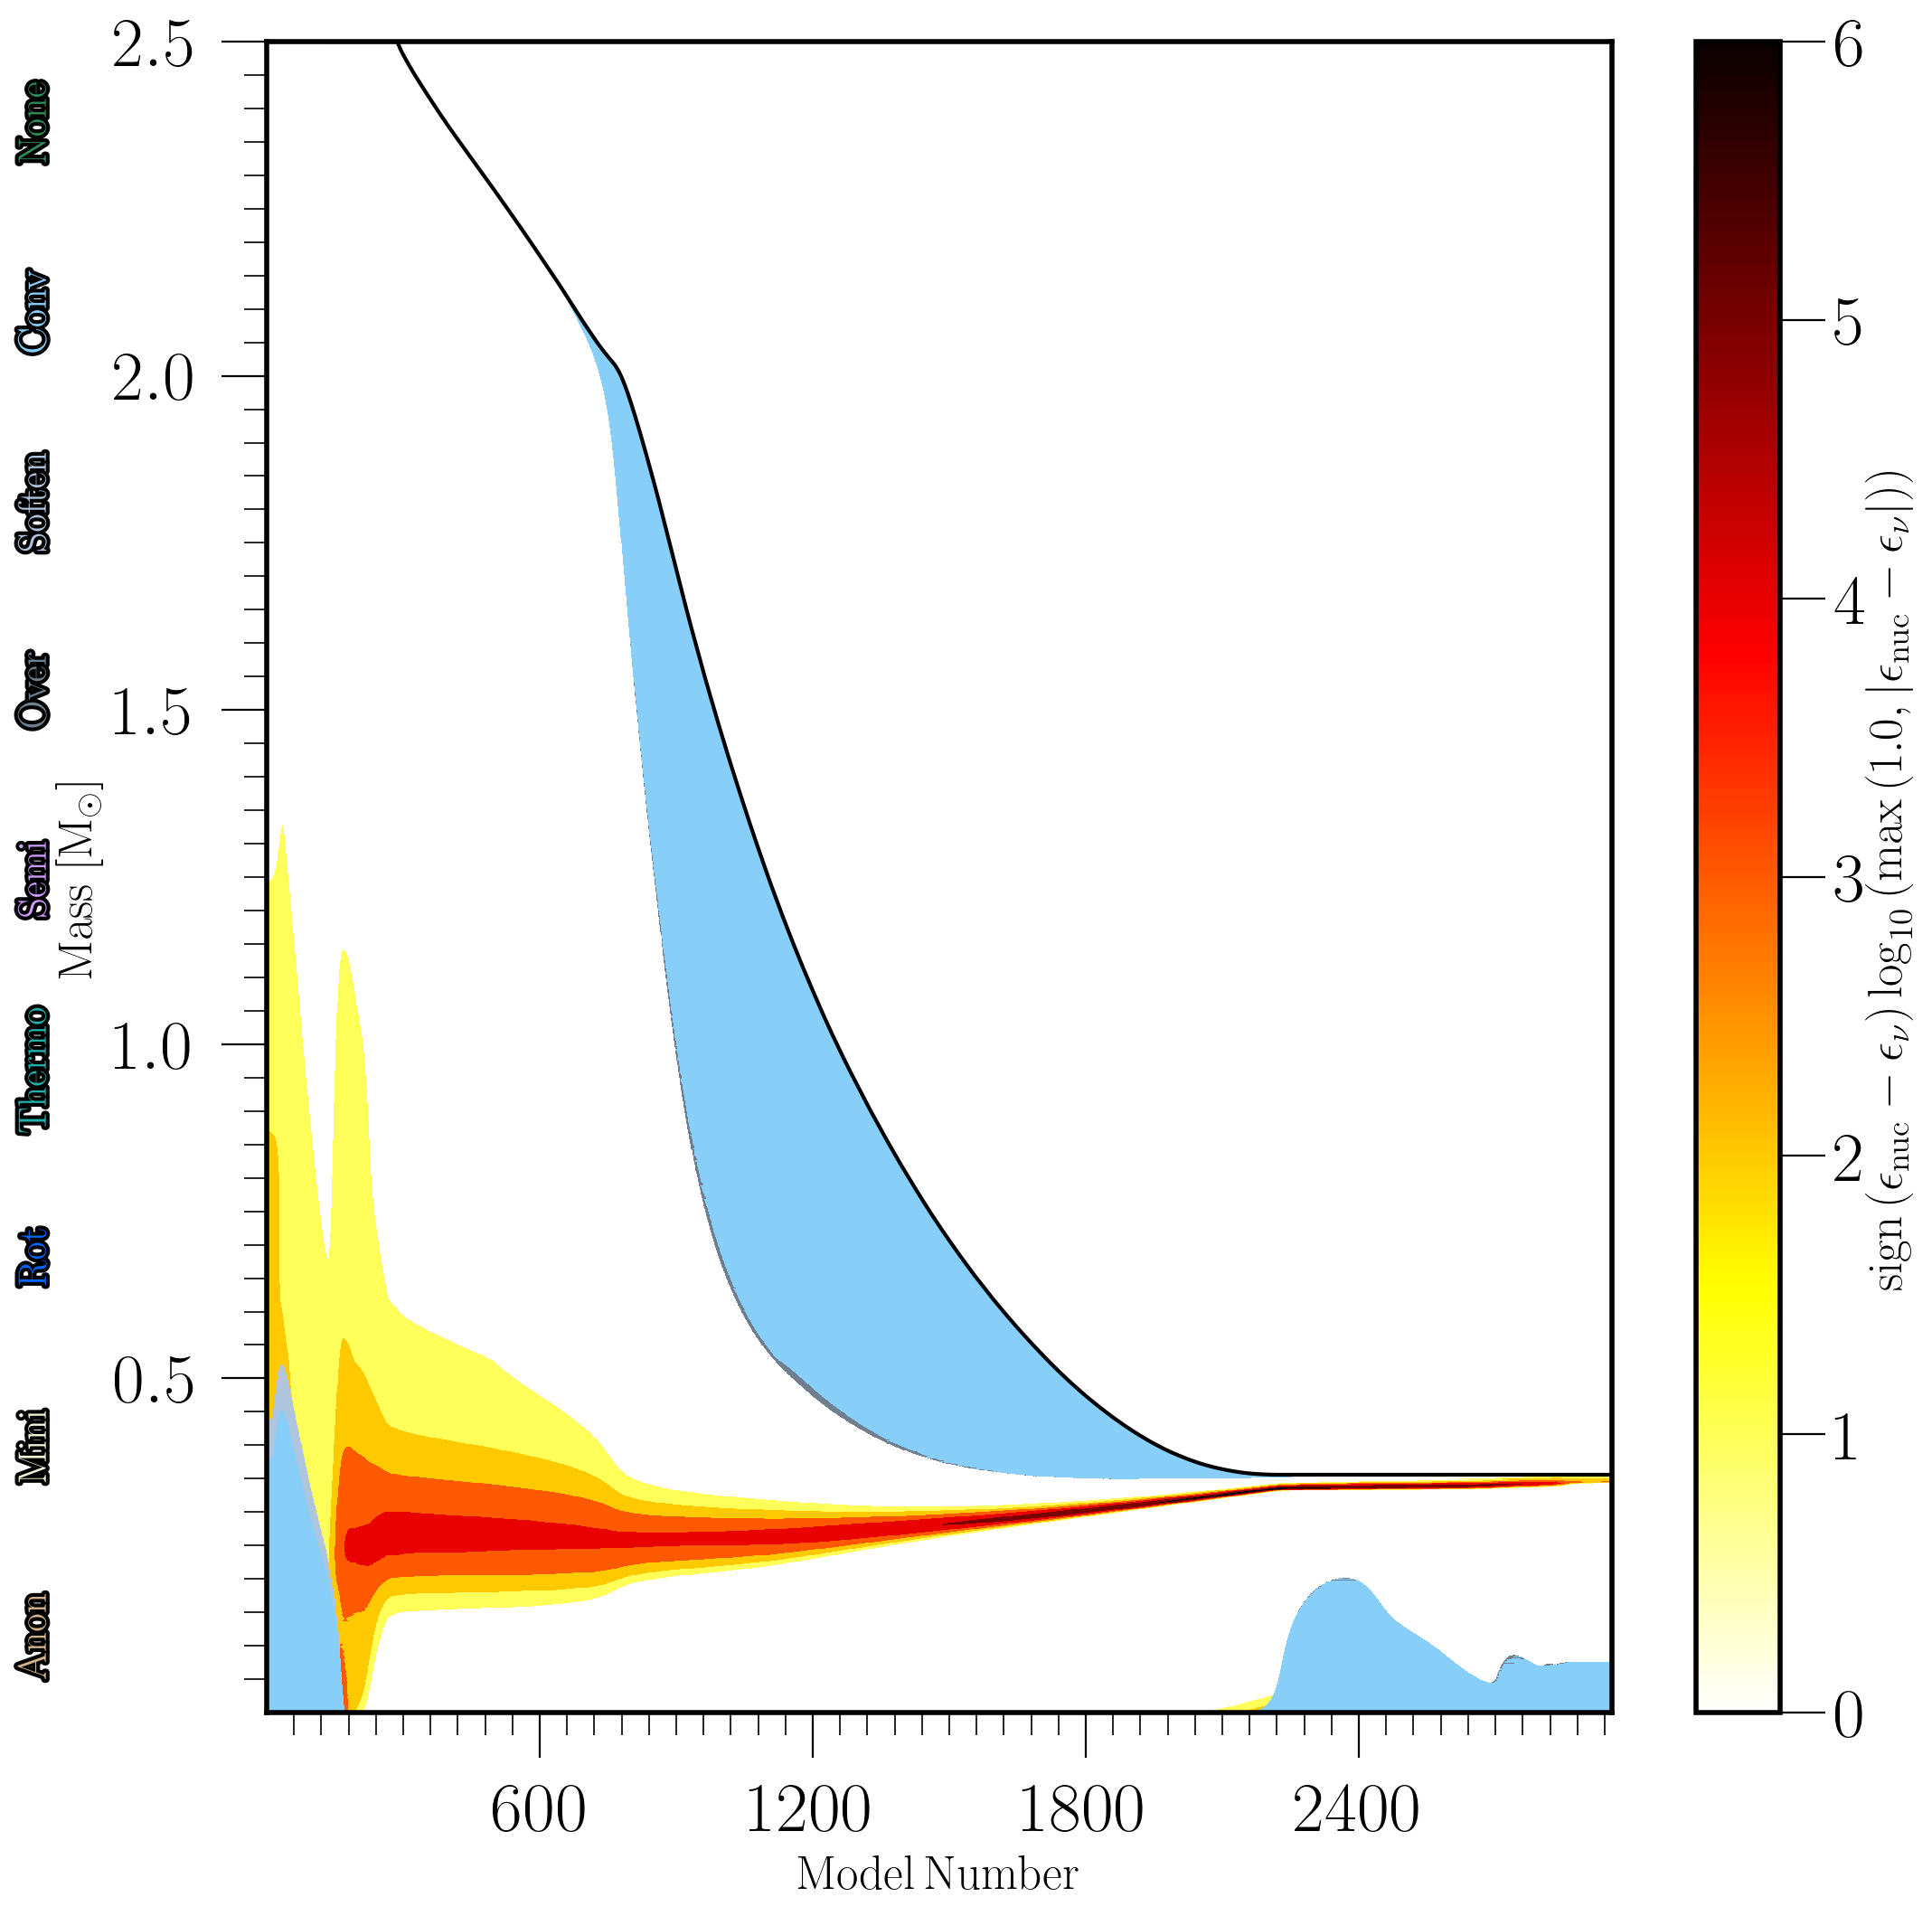

In [106]:
p.plotKip3(m, show_burn=True, show_mix=True, mix_hatch=False, mod_min=1, mod_max=2957)

In [112]:
track = tracks["detach_4_3_5"][1]
mt_mod_nums = track.history[track.history["log_abs_mdot"] > -10.0]["model_number"]
mt_start, mt_end = mt_mod_nums.min(), mt_mod_nums.max()

In [115]:
track.history.loc[mt_end - 1]["center_h1"]

0.5137739228620308

In [118]:
reload(mpt)

<module 'mesaplot_tom' from '/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/mesaplot_tom.py'>

In [127]:
single_track = mesagrid.Track(dir="../output/cluster/singles_grid/M_3.5/")

In [125]:
reload(mpt)

<module 'mesaplot_tom' from '/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/mesaplot_tom.py'>

Plotting BV profile for X_c = 0.4
Parsing None


100%|██████████| 191/191 [00:02<00:00, 95.05it/s] 


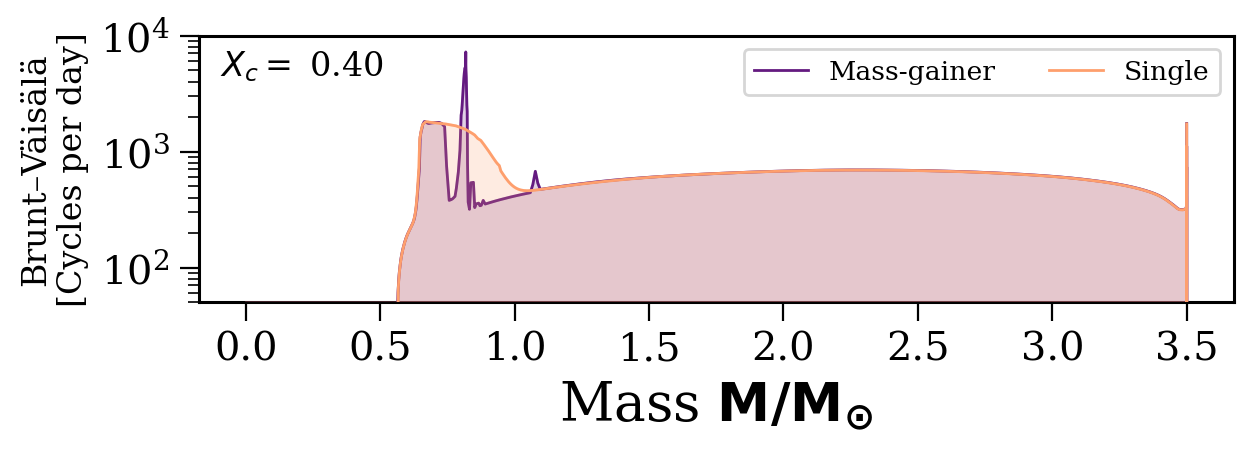

In [128]:
fig, ax = mpt.plot_BV_profile(X_c=0.4, tracks=[single_track, tracks["detach_4_3_5"][1]], mt_index=1, ref_index=0, show=False, label_with="an")